# 00c MPP analysis - split treatments by MPP type

Goal: combine all of the same MPP types from the different treatments - the downstream clustering is many required for MAST because I need raw data there

for MAST

done with this docker image:

docker run --rm -d --name test_eva -p 8885:8888 -e JUPYTER_ENABLE_LAB=YES -v /Users/efast/Documents/:/home/jovyan/work r_scanpy:vs5

## 1) Loading packages + data

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [19]:
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import scanpy.external as sce
import seaborn as sb

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [5]:
## read in each file

sample_strings = ['ct', 'dmPGE2', 'GCSF', 'indo', 'pIC']
condition_strings = ['MPP', 'MPP2', 'MPP1', 'MPP3']

file_base = './raw_data/B_'
file_end = '/outs/filtered_feature_bc_matrix'

ann_base = './write/demux_adata_hto_'
ann_end = '.csv'

write_path_base = './sc_objects/MAST_diffexpr_'
write_path_end = '.h5ad'


for j in range(len(condition_strings)):
    condition = condition_strings[j]
    
    #make first adata frame 'manually'
    adata_perm = sc.read_10x_mtx('./raw_data/B_ct/outs/filtered_feature_bc_matrix', var_names='gene_symbols', cache=True)
    ann = pd.read_csv('./write/demux_adata_hto_ct.csv', index_col= 0)
    adata_perm.obs.index = adata_perm.obs.index.map(lambda x: x.rstrip('-1')) # remove the '-1'
    adata_perm.obs = pd.merge(ann, adata_perm.obs, how='right', left_index = True, right_index = True) # merge the ann and adata.obs
    HSPC_renaming = {'CD48LSK': 'MPP3', 'ST': 'MPP1'} # dictionary for renaming
    adata_perm.obs = adata_perm.obs.replace(HSPC_renaming) #replace with new names

    # now select the condition
    adata_perm = adata_perm[adata_perm.obs['assignment'] == condition]
    
    adata_perm.obs['sample']= 'ct'
    

    for i in range(len(sample_strings)):
        sample = sample_strings[i]
        data_file = file_base+sample+file_end # assembles the name of the datafile
        ann_file = ann_base+sample+ann_end
          
        adata = sc.read_10x_mtx(data_file, var_names='gene_symbols', cache=True)    
        ann = pd.read_csv(ann_file, index_col= 0)

        adata.obs.index = adata.obs.index.map(lambda x: x.rstrip('-1')) # remove the '-1'
        adata.obs = pd.merge(ann, adata.obs, how='right', left_index = True, right_index = True) # merge the ann and adata.obs
    
        HSPC_renaming = {'CD48LSK': 'MPP3', 'ST': 'MPP1'} # dictionary for renaming
        adata.obs = adata.obs.replace(HSPC_renaming) #replace with new names

        # now needs to be split
        adata = adata[adata.obs['assignment'] == condition]
        
        adata.obs['sample']= sample
        
        adata_perm = adata_perm.concatenate(adata) #batch

    out_h5ad = write_path_base + condition + write_path_end
    adata_perm.write(out_h5ad)

... reading from cache file cache/raw_data-B_ct-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_ct-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_dmPGE2-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_GCSF-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_indo-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_pIC-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.
... storing 'assignment' as categorical
... storing 'demux_type' as categorical
... storing 'hto_type' as categorical
... storing 'rna_type' as categorical
... storing 'sample' as categorical
... storing 'feature_types' as categorical


... reading from cache file cache/raw_data-B_ct-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_ct-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_dmPGE2-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_GCSF-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_indo-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_pIC-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.
... storing 'assignment' as categorical
... storing 'demux_type' as categorical
... storing 'hto_type' as categorical
... storing 'rna_type' as categorical
... storing 'sample' as categorical
... storing 'feature_types' as categorical


... reading from cache file cache/raw_data-B_ct-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_ct-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_dmPGE2-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_GCSF-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_indo-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_pIC-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.
... storing 'assignment' as categorical
... storing 'demux_type' as categorical
... storing 'hto_type' as categorical
... storing 'rna_type' as categorical
... storing 'sample' as categorical
... storing 'feature_types' as categorical


... reading from cache file cache/raw_data-B_ct-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_ct-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_dmPGE2-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_GCSF-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_indo-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.


... reading from cache file cache/raw_data-B_pIC-outs-filtered_feature_bc_matrix-matrix.h5ad


Trying to set attribute `.obs` of view, copying.
... storing 'assignment' as categorical
... storing 'demux_type' as categorical
... storing 'hto_type' as categorical
... storing 'rna_type' as categorical
... storing 'sample' as categorical
... storing 'feature_types' as categorical


In [6]:
adata_perm = None
adata = None

## MPP

In [7]:
adata = sc.read(
    './sc_objects/MAST_diffexpr_MPP.h5ad')

In [8]:
adata

AnnData object with n_obs × n_vars = 6498 × 31053 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample'
    var: 'gene_ids', 'feature_types'

In [9]:
adata.obs['sample'].value_counts()

ct        1982
dmPGE2    1656
pIC       1068
GCSF      1002
indo       790
Name: sample, dtype: int64

In [10]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

# create metacolums in adata.obs for percentage mitochondrial counts and total counts/gene
mito_genes = adata.var_names.str.startswith('mt-')

# add the percent mitochondria to the adata.obs
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)

(array([2.835e+03, 7.800e+01, 1.500e+02, 2.740e+02, 2.870e+02, 3.310e+02,
        3.560e+02, 3.260e+02, 2.790e+02, 2.140e+02, 1.800e+02, 1.850e+02,
        1.410e+02, 1.370e+02, 9.100e+01, 8.800e+01, 3.600e+01, 8.100e+01,
        8.100e+01, 5.200e+01, 5.800e+01, 4.300e+01, 2.700e+01, 3.700e+01,
        1.800e+01, 1.900e+01, 1.100e+01, 1.600e+01, 1.100e+01, 4.000e+00,
        1.100e+01, 5.000e+00, 6.000e+00, 3.000e+00, 6.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 6.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([ 0.  ,  1.94,  3.88,  5.82,  7.76,  9.7 , 11.64, 13.58, 15.52,
        17.46, 19.4 , 21.34, 23.28, 25.22, 27.16, 29.1 , 31.04, 32.98,
        34.92, 36.86, 38.8 , 40.74, 42.68, 44.62, 46.56, 48.5 , 50.44,
        52.38, 54.32, 56.26, 58.2 , 60.14, 62.08, 64.02, 65.96, 67.9 ,
        69.84, 71.78, 73.72, 75.66, 77.6 , 79.54, 81.48, 83.42, 85.36,
        87.3 , 89.24,

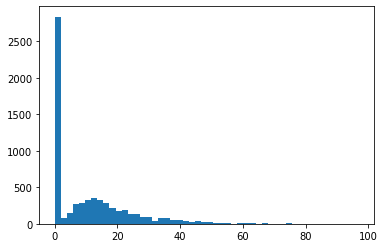

In [12]:
plt.hist(adata[: , 'Xist'].X.toarray(), bins=50)

In [14]:
# add in the Xist metadata to the adata.obs

adata.obs['Female'] = adata[: , 'Xist'].X.toarray() > 0 # make a column in adata.obs to identify female cells
adata.obs['Female_cat']=adata.obs['Female'].astype('category', copy=True) # make a column with category as dtype

### Make a metacolumn that stores male and female cells

adata.obs['Female_str'] = adata.obs['Female'].map(lambda x: str(x).lower() if isinstance(x, bool) else  x)
adata.obs['sex_sample'] = adata.obs['sample'].str.cat(others = adata.obs['Female_str'], sep='_')
adata.obs['sex_sample']=adata.obs['sex_sample'].astype('category', copy=True) # make a column with category as dtype

# make a metacolumn that sto
adata.obs['sex_sample'].value_counts()

ct_true         1218
dmPGE2_true      855
dmPGE2_false     801
ct_false         764
pIC_true         600
GCSF_true        584
indo_true        491
pIC_false        468
GCSF_false       418
indo_false       299
Name: sex_sample, dtype: int64

In [15]:
plt.rcParams['figure.figsize']=(12,8) #rescale figures

... storing 'Female_str' as categorical


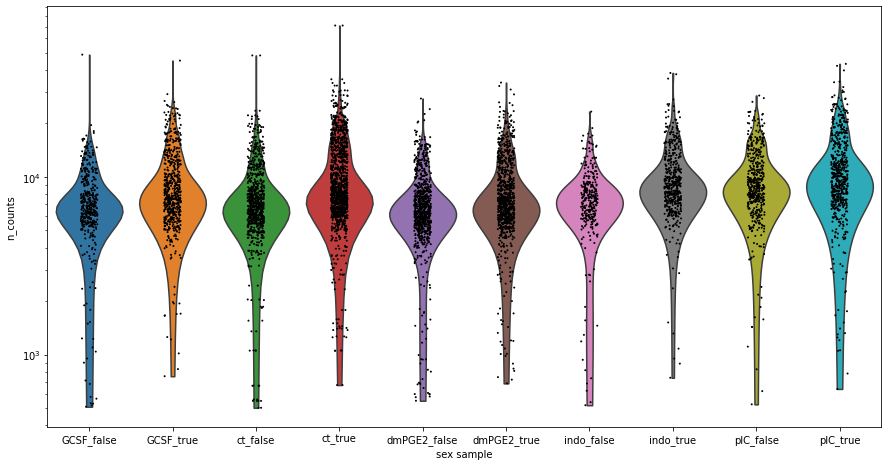

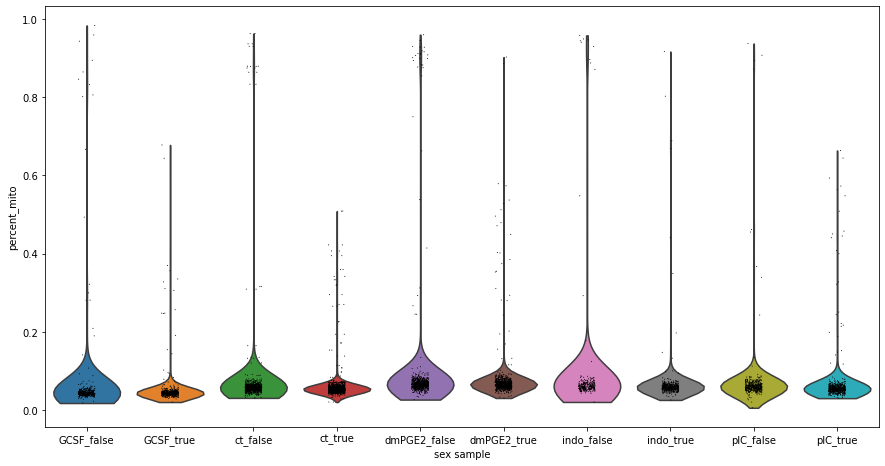

In [16]:
# Quality control - plot QC metrics
#Sample quality plots
t1 = sc.pl.violin(adata, 'n_counts', groupby='sex_sample', size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'percent_mito', groupby='sex_sample')

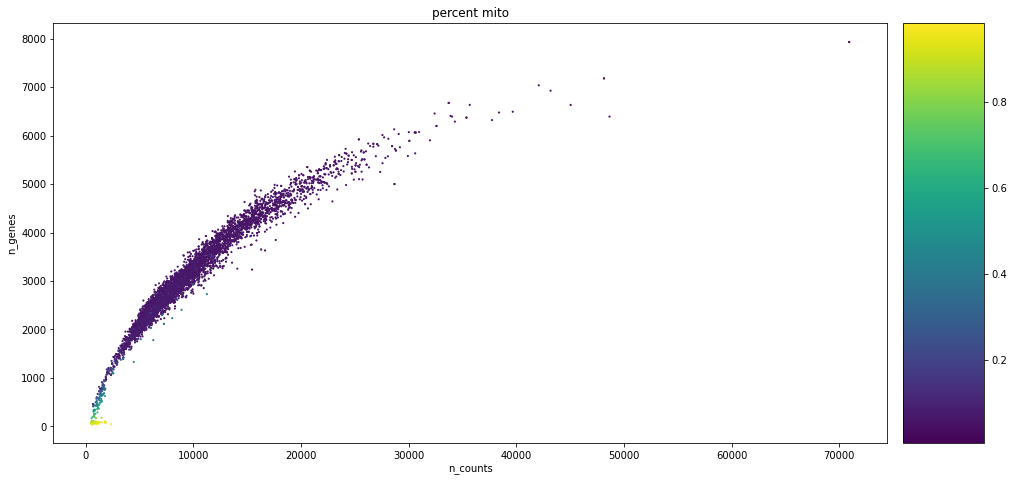

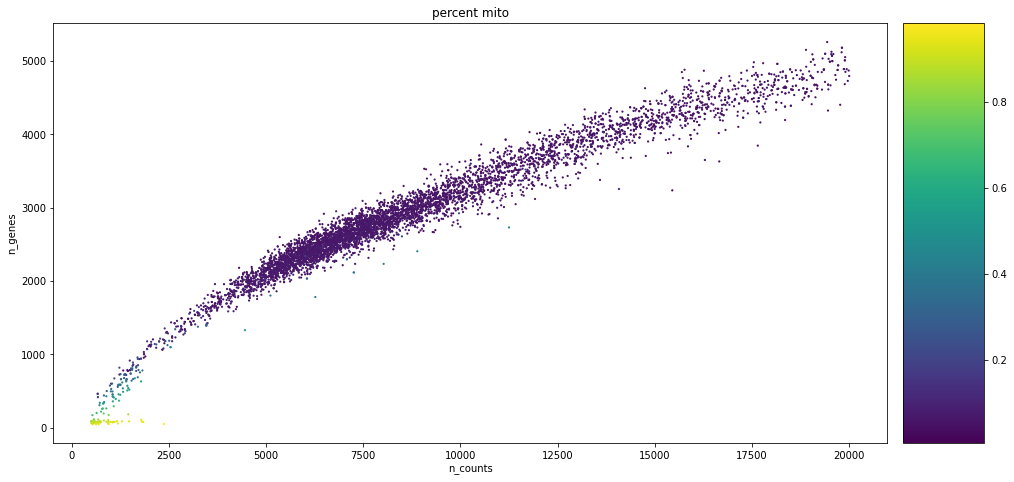

In [17]:
#Data quality summary plots
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='percent_mito')
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<20000], 'n_counts', 'n_genes', color='percent_mito')

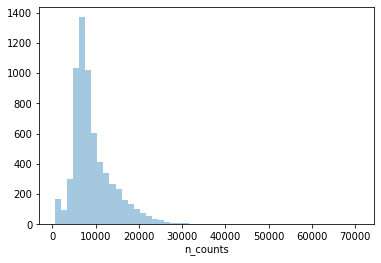

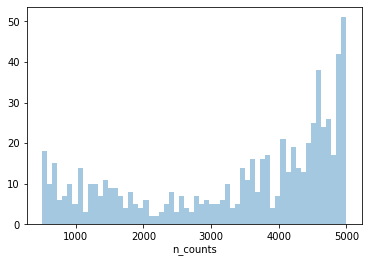

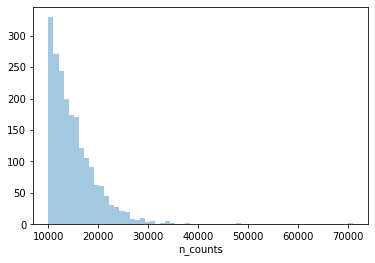

In [20]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<5000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

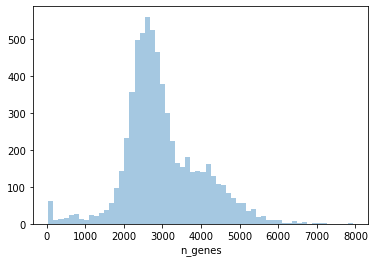

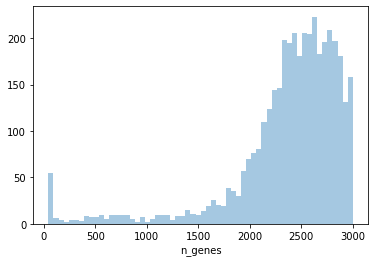

In [21]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<3000], kde=False, bins=60)
plt.show()


In [22]:
# Filter cells according to identified QC thresholds:
# leave filtering criteria relatively loose - can be made more stringent later

print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 3000)
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 25000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['percent_mito'] < 0.1]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 2000)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 6498
filtered out 235 cells that have less than 3000 counts
Number of cells after min count filter: 6263
filtered out 85 cells that have more than 25000 counts
Number of cells after max count filter: 6178
Number of cells after MT filter: 6126
filtered out 307 cells that have less than 2000 genes expressed


Trying to set attribute `.obs` of view, copying.


Number of cells after gene filter: 5819


In [23]:
# Filter out genes that are expressed in very few cells

#Filter genes:
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 31053
filtered out 17954 genes that are detected in less than 20 cells
Number of genes after cell filter: 13099


In [24]:
# normalize to 10K counts/cell and logtransform
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [25]:
adata.raw = adata
adata

AnnData object with n_obs × n_vars = 5819 × 13099 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'sex_sample_colors', 'log1p'

In [26]:
# make a new column with identifying the batches
adata.obs['batch'] = adata.obs['sample']

adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch1' if x == 'ct' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch1' if x == 'indo' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch2' if x == 'dmPGE2' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch2' if x == 'pIC' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch3' if x == 'GCSF' else x)

# ComBat batch correction
sc.pp.combat(adata, key='batch')

... storing 'batch' as categorical


Standardizing Data across genes.

Found 3 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments



/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_combat.py:338: RuntimeWarning: divide by zero encountered in true_divide
  change = max((abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max())


Adjusting data



(array([9.400e+02, 3.720e+02, 0.000e+00, 1.119e+03, 2.000e+00, 4.000e+00,
        0.000e+00, 5.000e+00, 1.100e+01, 3.000e+00, 1.400e+01, 8.000e+00,
        6.000e+00, 9.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 1.500e+01,
        4.000e+00, 7.000e+00, 1.100e+01, 1.100e+01, 1.200e+01, 1.500e+01,
        3.600e+01, 4.200e+01, 4.900e+01, 6.600e+01, 7.100e+01, 9.100e+01,
        1.110e+02, 1.130e+02, 1.400e+02, 1.600e+02, 2.480e+02, 2.480e+02,
        2.840e+02, 2.980e+02, 3.050e+02, 2.800e+02, 2.090e+02, 1.960e+02,
        1.250e+02, 8.600e+01, 4.000e+01, 2.200e+01, 1.300e+01, 4.000e+00,
        2.000e+00, 4.000e+00]),
 array([-0.12930505, -0.04549509,  0.03831487,  0.12212483,  0.20593479,
         0.28974475,  0.3735547 ,  0.45736466,  0.54117462,  0.62498458,
         0.70879454,  0.7926045 ,  0.87641446,  0.96022442,  1.04403438,
         1.12784434,  1.21165429,  1.29546425,  1.37927421,  1.46308417,
         1.54689413,  1.63070409,  1.71451405,  1.79832401,  1.88213397,
         1.

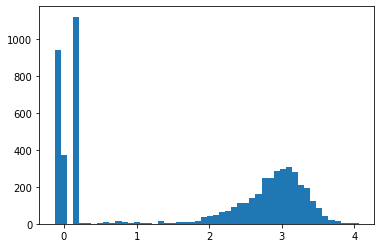

In [27]:
plt.hist(adata[: , 'Xist'].X.toarray(), bins=50)

In [28]:
#make column in adata.obs with corrected Xist

adata.obs['rXist'] = adata[: , 'Xist'].X.toarray() + 0.01 # make a column in adata.obs that stores the actual values of Xist, add 0.01 to get rid of "0" for downstream processin 

#regresses out Xist from adata 
sc.pp.regress_out(adata, ['rXist'])

regressing out ['rXist']


/opt/conda/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


    finished (0:01:09)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)

 Number of highly variable genes: 2499


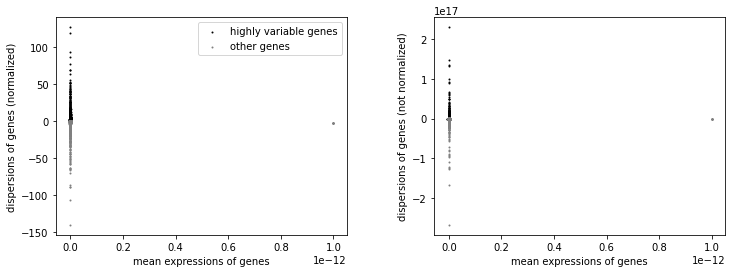

In [29]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=2500)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))

sc.pl.highly_variable_genes(adata)

In [30]:
adata #this now only contains the most variable genes

AnnData object with n_obs × n_vars = 5819 × 13099 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'rXist'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'sex_sample_colors', 'log1p'

In [31]:
#Scale data 
sc.pp.scale(adata, max_value=10)

In [32]:
# run PCA
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')

computing PCA with n_comps = 50
    on highly variable genes
    finished (0:00:02)


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


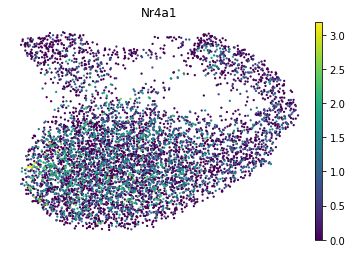

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


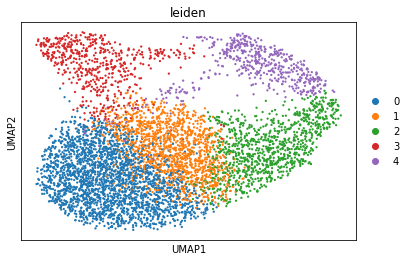

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


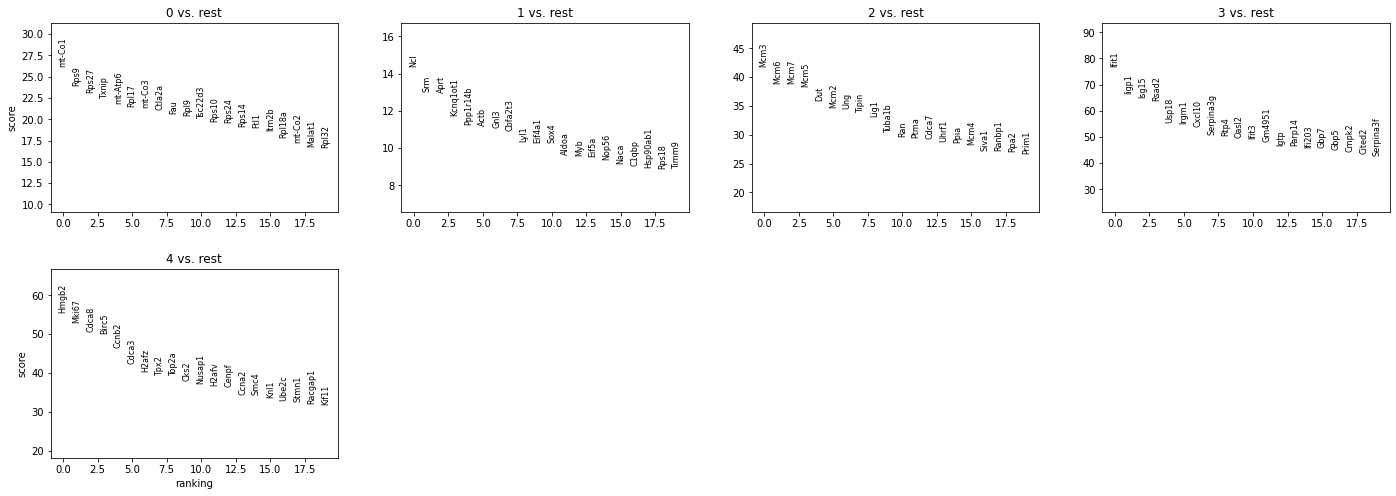

In [33]:
# redo the umap with different neigborhoods

sc.pp.neighbors(adata, n_neighbors=30, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['Nr4a1'], legend_loc='on data', frameon=False)
sc.tl.leiden(adata, resolution=0.6)
sc.pl.umap(adata, color=['leiden'])
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [34]:
adata.obs.head()

assignment   batch  counts demux_type    hto_type  \
AAACCCAAGATGGGCT-0-0-0-0-0        MPP  batch1  1021.0    singlet  background   
AAAGGATAGTAGTCTC-0-0-0-0-0        MPP  batch1   809.0    singlet  background   
AAAGGATCACGCTGAC-0-0-0-0-0        MPP  batch1   869.0    singlet  background   
AAAGGGCAGCAGCGAT-0-0-0-0-0        MPP  batch1   848.0    singlet  background   
AAAGGTACATGAGATA-0-0-0-0-0        MPP  batch1   735.0    singlet  background   

                           rna_type sample  n_counts  log_counts  n_genes  \
AAACCCAAGATGGGCT-0-0-0-0-0   signal     ct   17629.0    9.777698     4809   
AAAGGATAGTAGTCTC-0-0-0-0-0   signal     ct   13520.0    9.512590     4061   
AAAGGATCACGCTGAC-0-0-0-0-0   signal     ct   18169.0    9.807637     4622   
AAAGGGCAGCAGCGAT-0-0-0-0-0   signal     ct    8510.0    9.049468     2990   
AAAGGTACATGAGATA-0-0-0-0-0   signal     ct    5256.0    8.567506     2040   

                            percent_mito  Female Female_cat Female_str  \
AAACCCAAGATGGGCT-0-0-0-0-0      0.049501    True       True       true   
AAAGGATAGTAGTCTC-0-0-0-0-0      0.056176   False      False      false   
AAAGGATCACGCTGAC-0-0-0-0-0      0.049802    True       True       true   
AAAGGGCAGCAGCGAT-0-0-0-0-0      0.056965   False      False      false   
AAAGGTACATGAGATA-0-0-0-0-0      0.057626    True       True       true   

                           sex_sample     rXist leiden  
AAACCCAAGATGGGCT-0-0-0-0-0    ct_true  3.338417      4  
AAAGGATAGTAGTCTC-0-0-0-0-0   ct_false -0.119305      1  
AAAGGATCACGCTGAC-0-0-0-0-0    ct_true  3.066876      2  
AAAGGGCAGCAGCGAT-0-0-0-0-0   ct_false -0.119305      2  
AAAGGTACATGAGATA-0-0-0-0-0    ct_true  2.669866      0

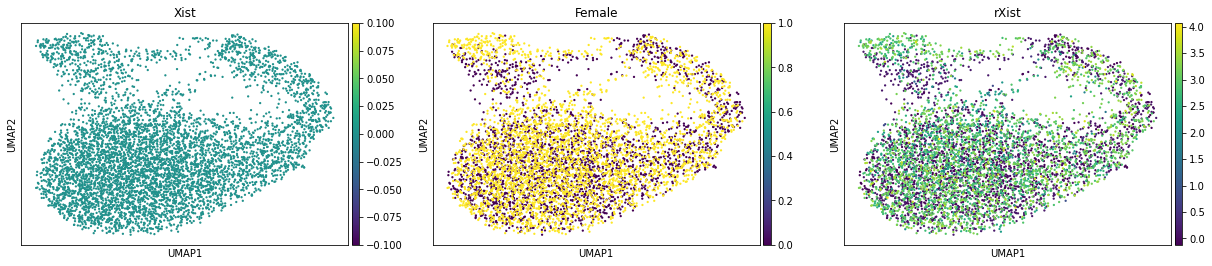

In [35]:
sc.pl.umap(adata, color=['Xist', 'Female', 'rXist'], use_raw=False )

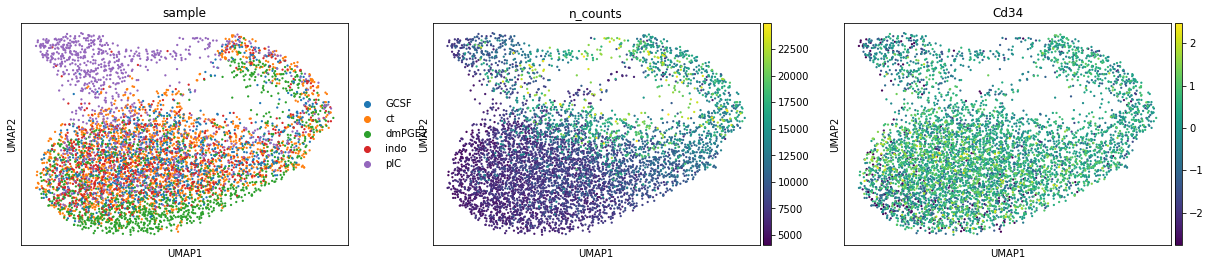

In [36]:
sc.pl.umap(adata, color=['sample', 'n_counts', 'Cd34'], use_raw=False )

In [37]:
# write the file to disk
adata.write('./sc_objects/MAST_diffexpr_MPP_annotated.h5ad')

## MPP1

In [74]:
adata = None

In [75]:
adata = sc.read(
    './sc_objects/MAST_diffexpr_MPP1.h5ad')

In [76]:
adata.obs['sample'].value_counts()

ct        2580
indo      1187
pIC       1084
dmPGE2     653
GCSF       646
Name: sample, dtype: int64

In [77]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

# create metacolums in adata.obs for percentage mitochondrial counts and total counts/gene
mito_genes = adata.var_names.str.startswith('mt-')

# add the percent mitochondria to the adata.obs
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)

(array([3.163e+03, 6.300e+01, 1.540e+02, 1.810e+02, 3.230e+02, 2.440e+02,
        3.350e+02, 1.590e+02, 2.480e+02, 1.360e+02, 2.180e+02, 9.700e+01,
        1.450e+02, 8.100e+01, 1.100e+02, 5.500e+01, 7.700e+01, 5.700e+01,
        4.700e+01, 2.500e+01, 3.800e+01, 3.200e+01, 2.800e+01, 1.000e+01,
        1.900e+01, 8.000e+00, 1.500e+01, 1.200e+01, 1.500e+01, 6.000e+00,
        9.000e+00, 6.000e+00, 6.000e+00, 2.000e+00, 3.000e+00, 4.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
         22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
         45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
         67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
         90. ,  92.5,  95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. ,
        112.5, 115. ,

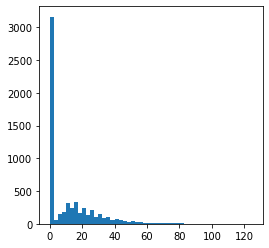

In [78]:
plt.hist(adata[: , 'Xist'].X.toarray(), bins=50)

In [79]:
# add in the Xist metadata to the adata.obs

adata.obs['Female'] = adata[: , 'Xist'].X.toarray() > 0 # make a column in adata.obs to identify female cells
adata.obs['Female_cat']=adata.obs['Female'].astype('category', copy=True) # make a column with category as dtype

### Make a metacolumn that stores male and female cells

adata.obs['Female_str'] = adata.obs['Female'].map(lambda x: str(x).lower() if isinstance(x, bool) else  x)
adata.obs['sex_sample'] = adata.obs['sample'].str.cat(others = adata.obs['Female_str'], sep='_')
adata.obs['sex_sample']=adata.obs['sex_sample'].astype('category', copy=True) # make a column with category as dtype

# make a metacolumn that sto
adata.obs['sex_sample'].value_counts()

ct_true         1348
ct_false        1232
indo_false       624
pIC_false        611
indo_true        563
pIC_true         473
dmPGE2_true      358
GCSF_true        346
GCSF_false       300
dmPGE2_false     295
Name: sex_sample, dtype: int64

In [80]:
plt.rcParams['figure.figsize']=(12,8) #rescale figures

... storing 'Female_str' as categorical


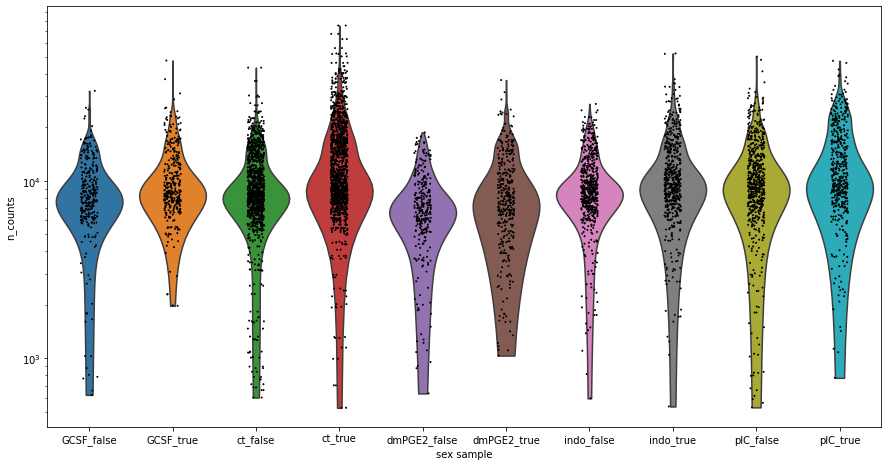

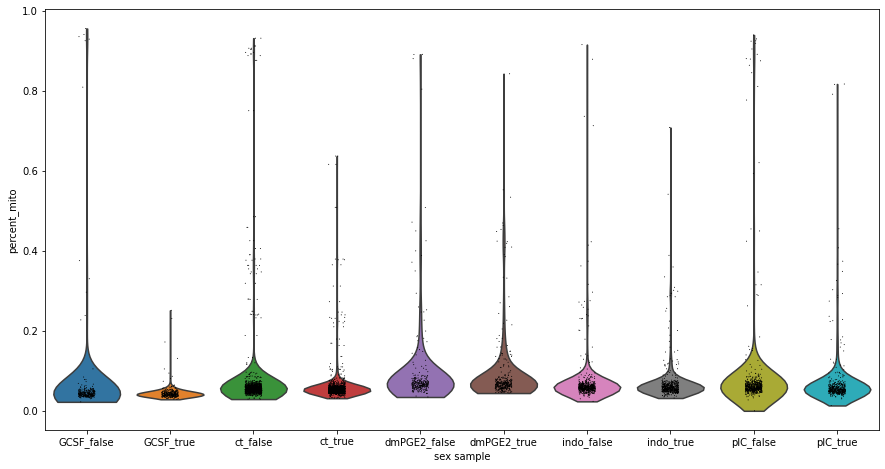

In [81]:
# Quality control - plot QC metrics
#Sample quality plots
t1 = sc.pl.violin(adata, 'n_counts', groupby='sex_sample', size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'percent_mito', groupby='sex_sample')

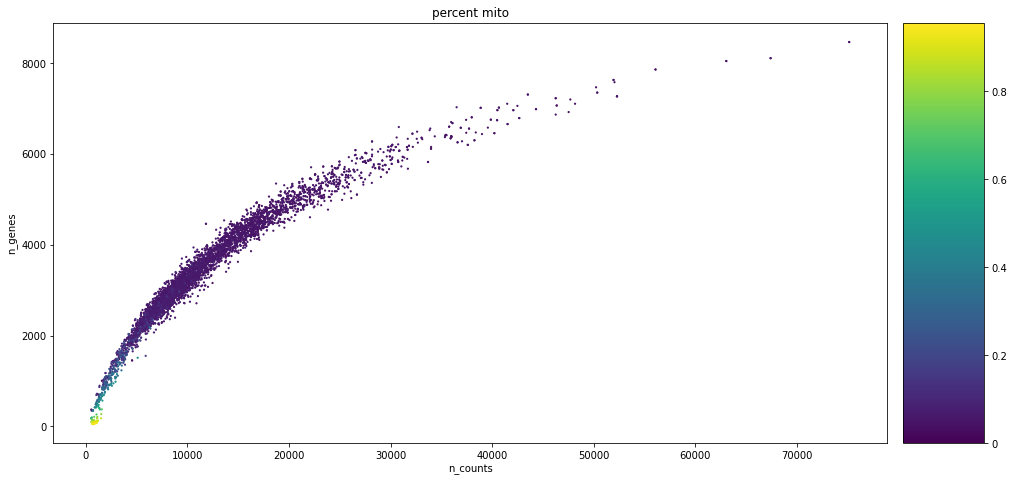

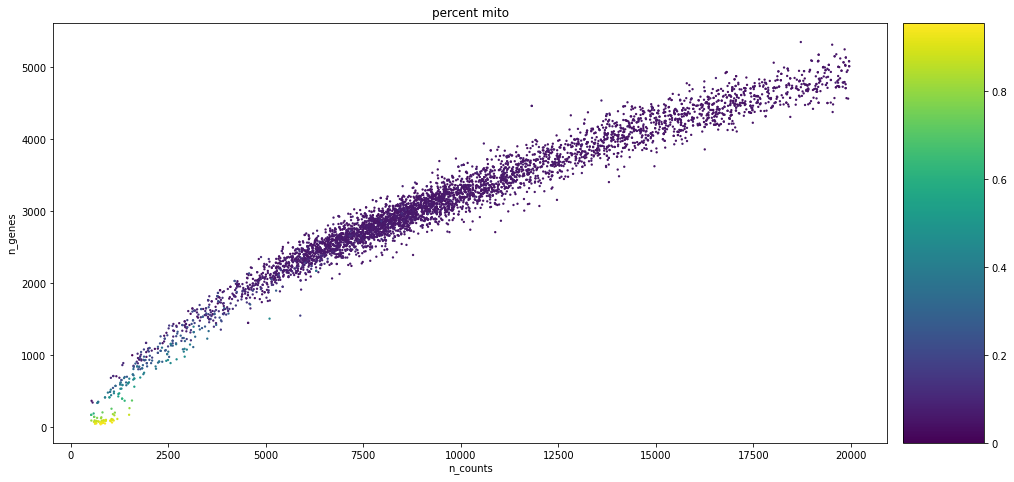

In [82]:
#Data quality summary plots
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='percent_mito')
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<20000], 'n_counts', 'n_genes', color='percent_mito')

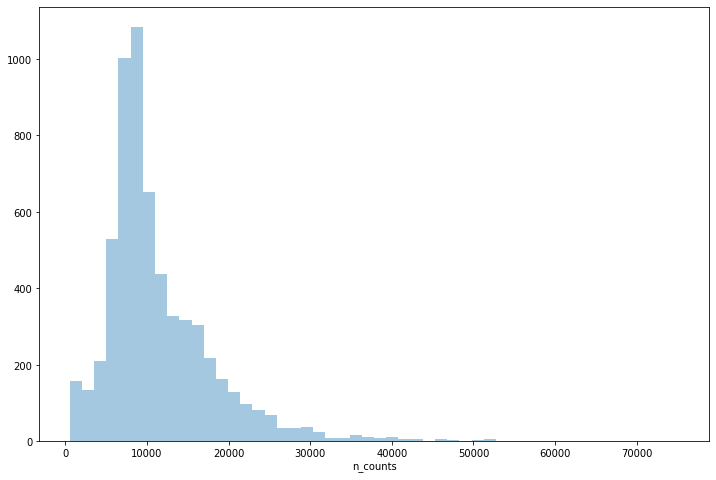

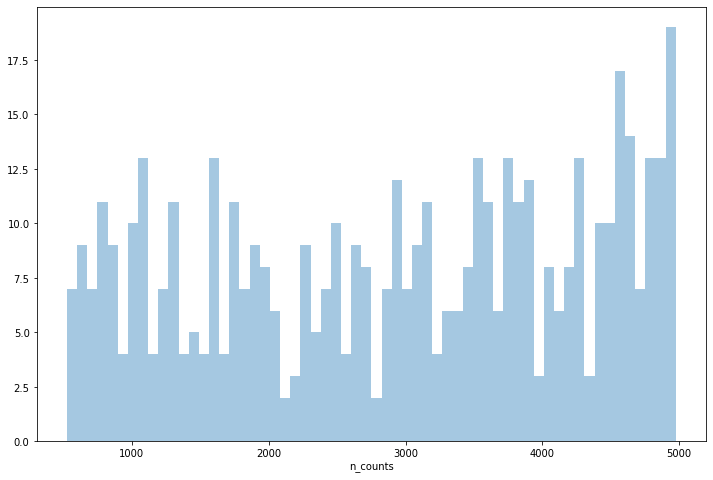

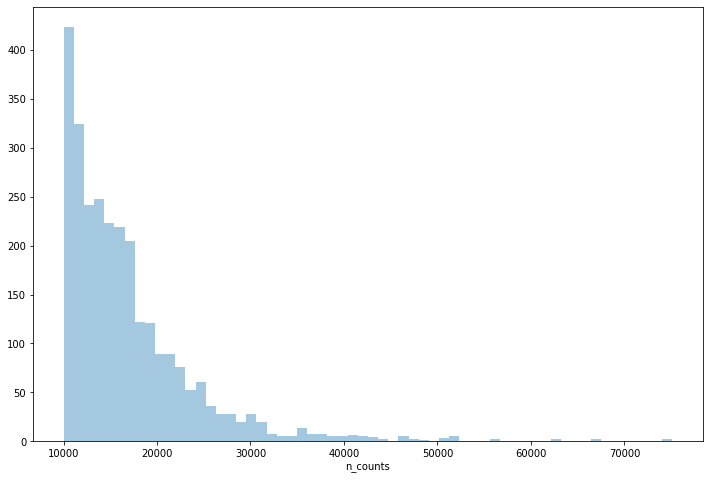

In [83]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<5000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

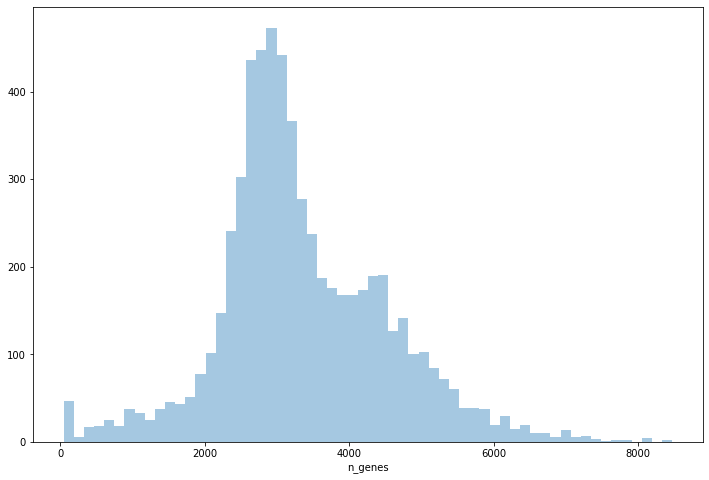

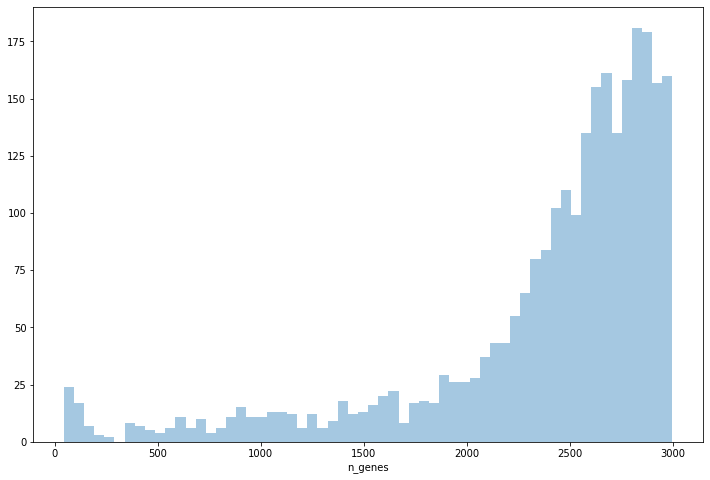

In [84]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<3000], kde=False, bins=60)
plt.show()


In [85]:
# Filter cells according to identified QC thresholds:
# leave filtering criteria relatively loose - can be made more stringent later

print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 3000)
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 25000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['percent_mito'] < 0.1]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 2000)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 6150
filtered out 246 cells that have less than 3000 counts
Number of cells after min count filter: 5904
filtered out 267 cells that have more than 25000 counts
Number of cells after max count filter: 5637
Number of cells after MT filter: 5474
filtered out 131 cells that have less than 2000 genes expressed


Trying to set attribute `.obs` of view, copying.


Number of cells after gene filter: 5343


In [86]:
# Filter out genes that are expressed in very few cells

#Filter genes:
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 31053
filtered out 17767 genes that are detected in less than 20 cells
Number of genes after cell filter: 13286


In [87]:
# normalize to 10K counts/cell and logtransform
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [88]:
adata.raw = adata
adata

AnnData object with n_obs × n_vars = 5343 × 13286 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'sex_sample_colors', 'log1p'

In [89]:
# make a new column with identifying the batches
adata.obs['batch'] = adata.obs['sample']

adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch1' if x == 'ct' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch1' if x == 'indo' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch2' if x == 'dmPGE2' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch2' if x == 'pIC' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch3' if x == 'GCSF' else x)

# ComBat batch correction
sc.pp.combat(adata, key='batch')

... storing 'batch' as categorical


Standardizing Data across genes.

Found 3 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments



/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_combat.py:338: RuntimeWarning: divide by zero encountered in true_divide
  change = max((abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max())


Adjusting data



(array([2.740e+02, 1.712e+03, 7.650e+02, 0.000e+00, 0.000e+00, 1.000e+00,
        1.100e+01, 7.000e+00, 5.000e+00, 9.000e+00, 9.000e+00, 1.900e+01,
        7.000e+00, 5.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 5.000e+00,
        1.000e+01, 0.000e+00, 5.000e+00, 1.200e+01, 1.300e+01, 1.400e+01,
        1.600e+01, 1.500e+01, 2.100e+01, 3.600e+01, 3.600e+01, 5.700e+01,
        6.400e+01, 9.900e+01, 1.220e+02, 1.480e+02, 1.900e+02, 1.900e+02,
        2.340e+02, 2.440e+02, 2.450e+02, 2.070e+02, 1.640e+02, 1.310e+02,
        1.110e+02, 5.400e+01, 3.500e+01, 1.900e+01, 1.100e+01, 2.000e+00,
        2.000e+00, 1.000e+00]),
 array([-0.15019341, -0.06615678,  0.01787984,  0.10191647,  0.18595309,
         0.26998972,  0.35402634,  0.43806297,  0.52209959,  0.60613622,
         0.69017284,  0.77420947,  0.85824609,  0.94228272,  1.02631934,
         1.11035597,  1.19439259,  1.27842921,  1.36246584,  1.44650246,
         1.53053909,  1.61457571,  1.69861234,  1.78264896,  1.86668559,
         1.

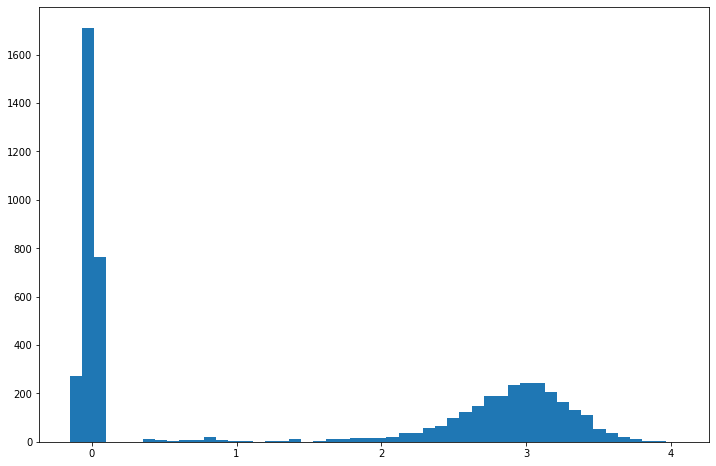

In [90]:
plt.hist(adata[: , 'Xist'].X.toarray(), bins=50)

In [91]:
#make column in adata.obs with corrected Xist

adata.obs['rXist'] = adata[: , 'Xist'].X.toarray() + 0.01 # make a column in adata.obs that stores the actual values of Xist, add 0.01 to get rid of "0" for downstream processin 

#regresses out Xist from adata 
sc.pp.regress_out(adata, ['rXist'])

regressing out ['rXist']
    finished (0:01:15)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)

 Number of highly variable genes: 2499


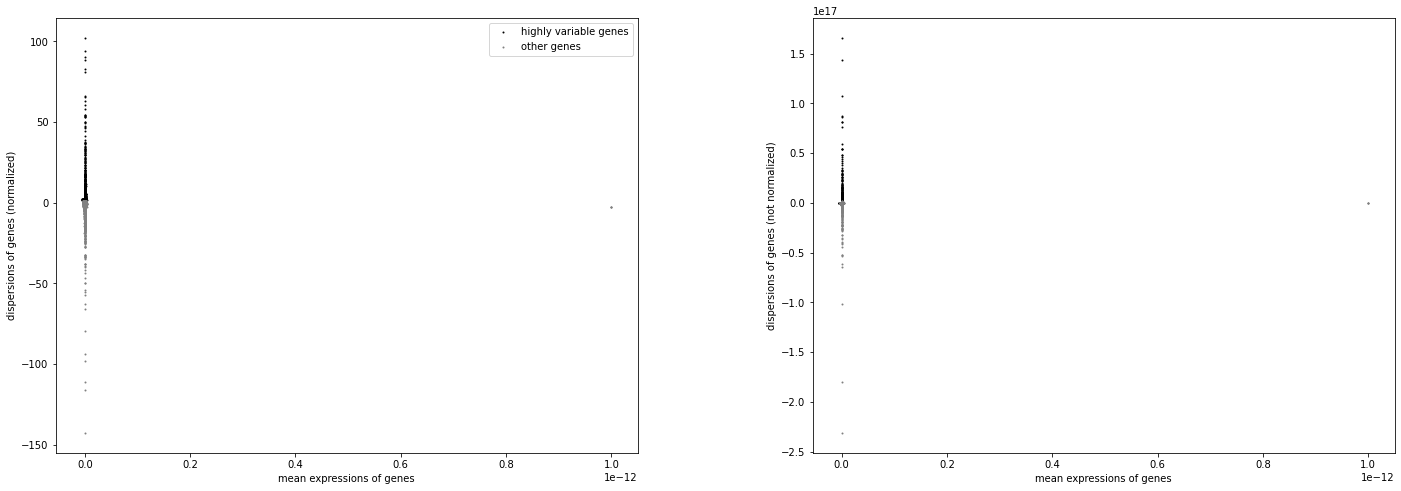

In [92]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=2500)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))

sc.pl.highly_variable_genes(adata)

In [93]:
adata #this now only contains the most variable genes

AnnData object with n_obs × n_vars = 5343 × 13286 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'rXist'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'sex_sample_colors', 'log1p'

In [94]:
#Scale data 
sc.pp.scale(adata, max_value=10)

In [95]:
# run PCA
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')

computing PCA with n_comps = 50
    on highly variable genes
    finished (0:00:02)


In [96]:
plt.rcParams['figure.figsize']=(4,4) #rescale figures

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


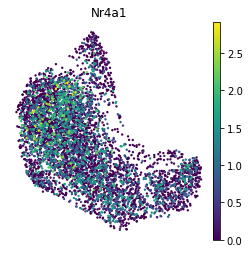

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


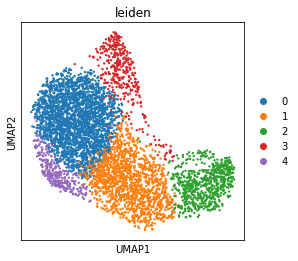

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


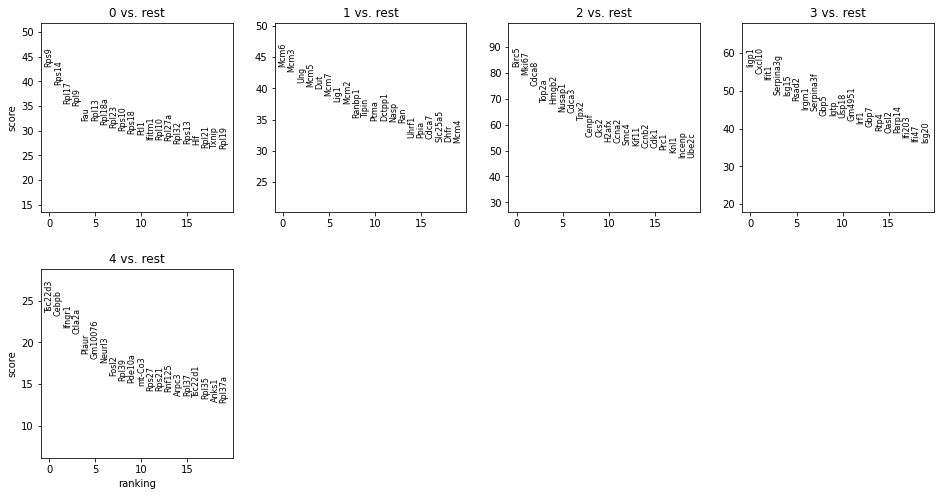

In [97]:
# redo the umap with different neigborhoods

sc.pp.neighbors(adata, n_neighbors=30, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['Nr4a1'], legend_loc='on data', frameon=False)
sc.tl.leiden(adata, resolution=0.6)
sc.pl.umap(adata, color=['leiden'])
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [98]:
adata.obs.head()

assignment   batch  counts demux_type    hto_type  \
AAACCCATCACATTGG-0-0-0-0-0       MPP1  batch1   781.0    singlet  background   
AAACGAAGTACTGGGA-0-0-0-0-0       MPP1  batch1   835.0    singlet  background   
AAACGAATCTCGGTAA-0-0-0-0-0       MPP1  batch1   745.0    singlet  background   
AAAGAACTCGACCATA-0-0-0-0-0       MPP1  batch1  1210.0    singlet      signal   
AAAGGATAGAAGGGAT-0-0-0-0-0       MPP1  batch1   701.0    singlet  background   

                           rna_type sample  n_counts  log_counts  n_genes  \
AAACCCATCACATTGG-0-0-0-0-0   signal     ct    7089.0    8.866864     2549   
AAACGAAGTACTGGGA-0-0-0-0-0   signal     ct   10922.0    9.298627     3285   
AAACGAATCTCGGTAA-0-0-0-0-0   signal     ct    7894.0    8.974238     2694   
AAAGAACTCGACCATA-0-0-0-0-0   signal     ct   19285.0    9.867290     5001   
AAAGGATAGAAGGGAT-0-0-0-0-0   signal     ct    6741.0    8.816854     2466   

                            percent_mito  Female Female_cat Female_str  \
AAACCCATCACATTGG-0-0-0-0-0      0.063725   False      False      false   
AAACGAAGTACTGGGA-0-0-0-0-0      0.055022    True       True       true   
AAACGAATCTCGGTAA-0-0-0-0-0      0.050905    True       True       true   
AAAGAACTCGACCATA-0-0-0-0-0      0.044844   False      False      false   
AAAGGATAGAAGGGAT-0-0-0-0-0      0.073811   False      False      false   

                           sex_sample     rXist leiden  
AAACCCATCACATTGG-0-0-0-0-0   ct_false  0.006942      0  
AAACGAAGTACTGGGA-0-0-0-0-0    ct_true  2.952886      1  
AAACGAATCTCGGTAA-0-0-0-0-0    ct_true  2.404951      0  
AAAGAACTCGACCATA-0-0-0-0-0   ct_false  0.006942      1  
AAAGGATAGAAGGGAT-0-0-0-0-0   ct_false  0.006942      0

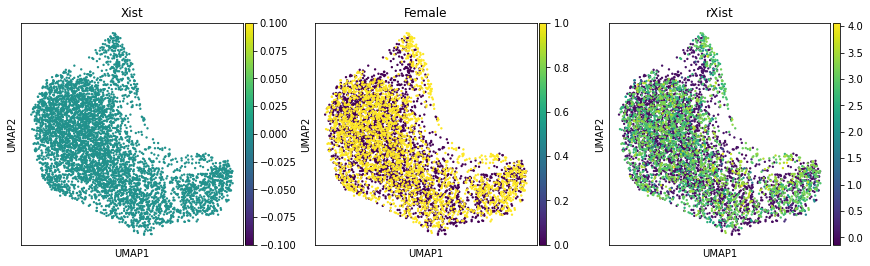

In [99]:
sc.pl.umap(adata, color=['Xist', 'Female', 'rXist'], use_raw=False )

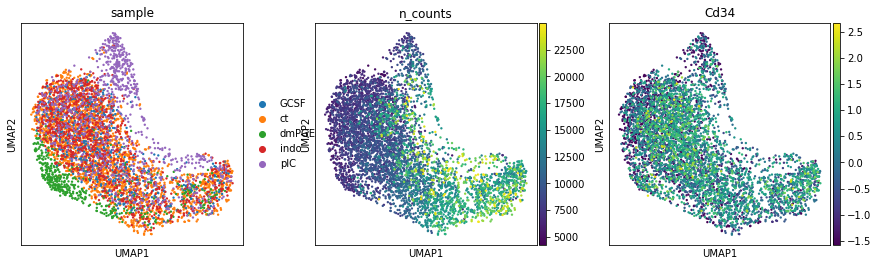

In [100]:
sc.pl.umap(adata, color=['sample', 'n_counts', 'Cd34'], use_raw=False )

In [101]:
# write the file to disk
adata.write('./sc_objects/MAST_diffexpr_MPP1_annotated.h5ad')

## MPP2

In [102]:
adata = None

In [103]:
adata = sc.read(
    './sc_objects/MAST_diffexpr_MPP2.h5ad')

In [104]:
adata.obs['sample'].value_counts()

ct        2554
dmPGE2    2199
GCSF      1721
pIC        993
indo       711
Name: sample, dtype: int64

In [105]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

# create metacolums in adata.obs for percentage mitochondrial counts and total counts/gene
mito_genes = adata.var_names.str.startswith('mt-')

# add the percent mitochondria to the adata.obs
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)

(array([3.723e+03, 1.620e+02, 3.000e+02, 2.810e+02, 2.740e+02, 4.110e+02,
        2.920e+02, 3.580e+02, 5.110e+02, 3.420e+02, 3.100e+02, 3.120e+02,
        1.830e+02, 1.880e+02, 8.200e+01, 8.100e+01, 9.100e+01, 4.300e+01,
        3.300e+01, 3.100e+01, 3.300e+01, 1.900e+01, 2.400e+01, 1.100e+01,
        8.000e+00, 2.000e+01, 3.000e+00, 1.100e+01, 4.000e+00, 5.000e+00,
        8.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00]),
 array([  0.  ,   3.36,   6.72,  10.08,  13.44,  16.8 ,  20.16,  23.52,
         26.88,  30.24,  33.6 ,  36.96,  40.32,  43.68,  47.04,  50.4 ,
         53.76,  57.12,  60.48,  63.84,  67.2 ,  70.56,  73.92,  77.28,
         80.64,  84.  ,  87.36,  90.72,  94.08,  97.44, 100.8 , 104.16,
        107.52, 110.88, 114.24, 117.6 , 120.96, 124.32, 127.68, 131.04,
        134.4 , 

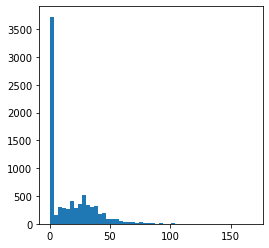

In [106]:
plt.hist(adata[: , 'Xist'].X.toarray(), bins=50)

In [107]:
# add in the Xist metadata to the adata.obs

adata.obs['Female'] = adata[: , 'Xist'].X.toarray() > 0 # make a column in adata.obs to identify female cells
adata.obs['Female_cat']=adata.obs['Female'].astype('category', copy=True) # make a column with category as dtype

### Make a metacolumn that stores male and female cells

adata.obs['Female_str'] = adata.obs['Female'].map(lambda x: str(x).lower() if isinstance(x, bool) else  x)
adata.obs['sex_sample'] = adata.obs['sample'].str.cat(others = adata.obs['Female_str'], sep='_')
adata.obs['sex_sample']=adata.obs['sex_sample'].astype('category', copy=True) # make a column with category as dtype

# make a metacolumn that sto
adata.obs['sex_sample'].value_counts()

ct_true         1370
dmPGE2_true     1318
ct_false        1184
GCSF_true       1123
dmPGE2_false     881
GCSF_false       598
pIC_false        499
pIC_true         494
indo_true        362
indo_false       349
Name: sex_sample, dtype: int64

In [108]:
plt.rcParams['figure.figsize']=(12,8) #rescale figures

... storing 'Female_str' as categorical


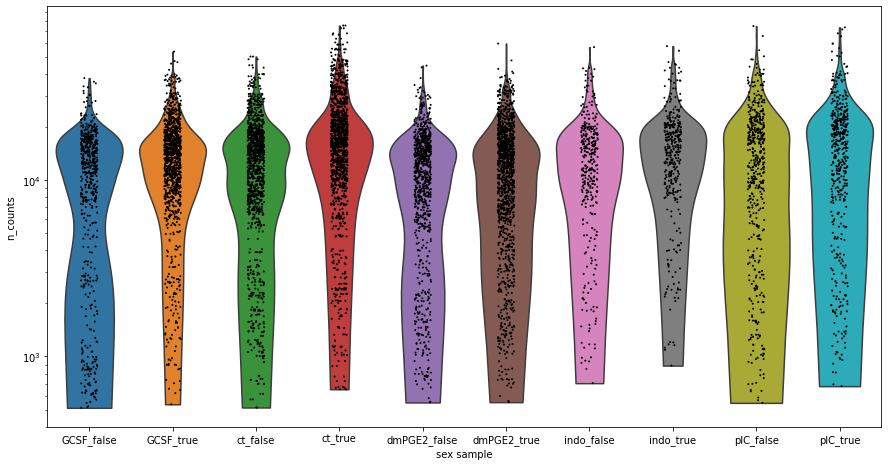

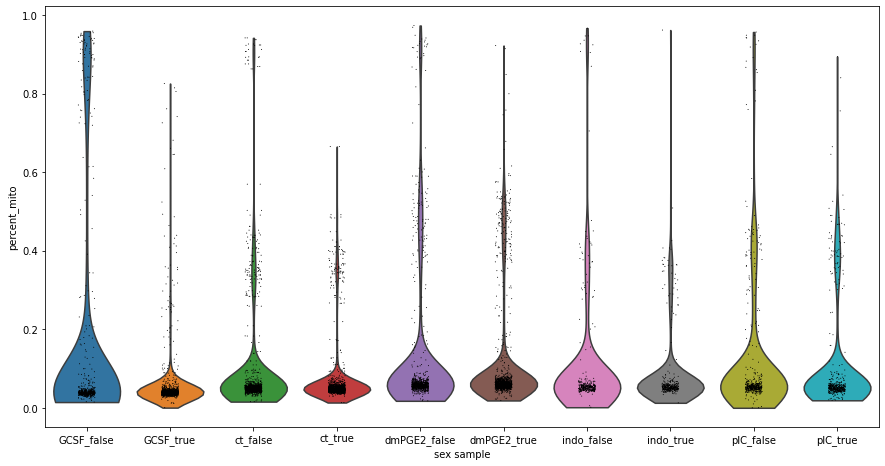

In [109]:
# Quality control - plot QC metrics
#Sample quality plots
t1 = sc.pl.violin(adata, 'n_counts', groupby='sex_sample', size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'percent_mito', groupby='sex_sample')

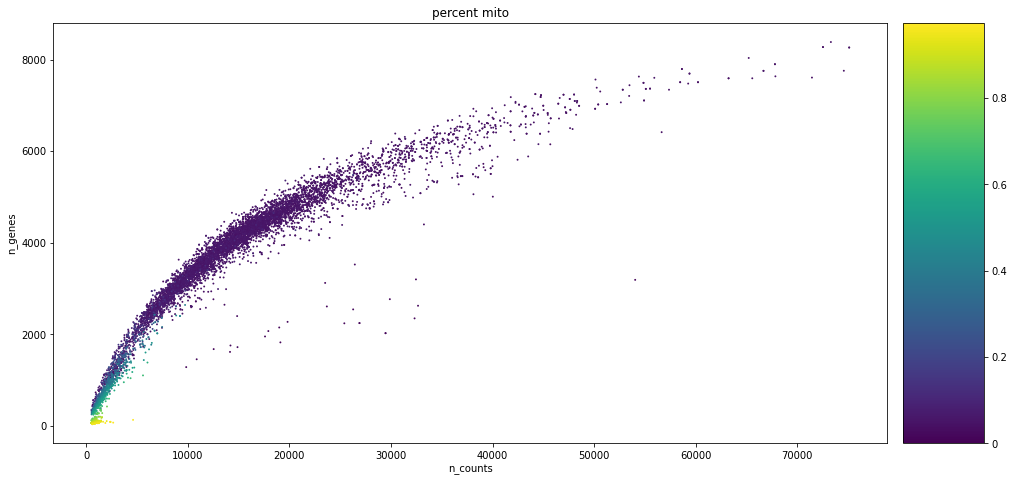

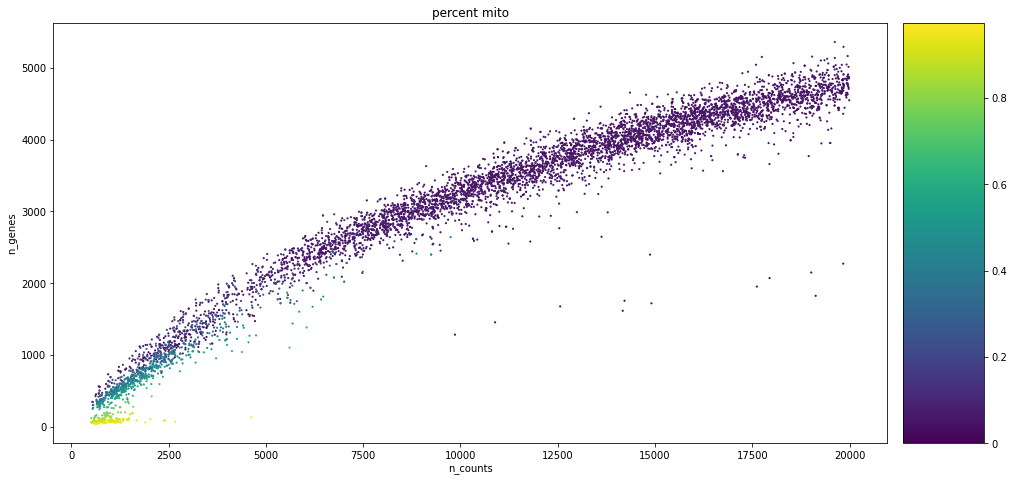

In [110]:
#Data quality summary plots
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='percent_mito')
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<20000], 'n_counts', 'n_genes', color='percent_mito')

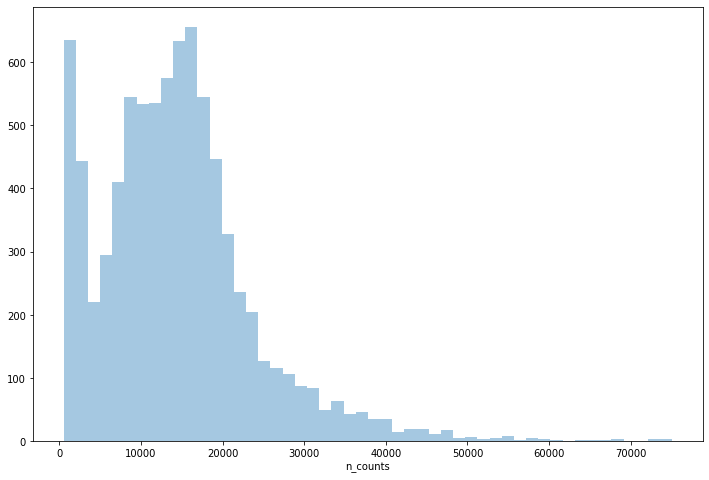

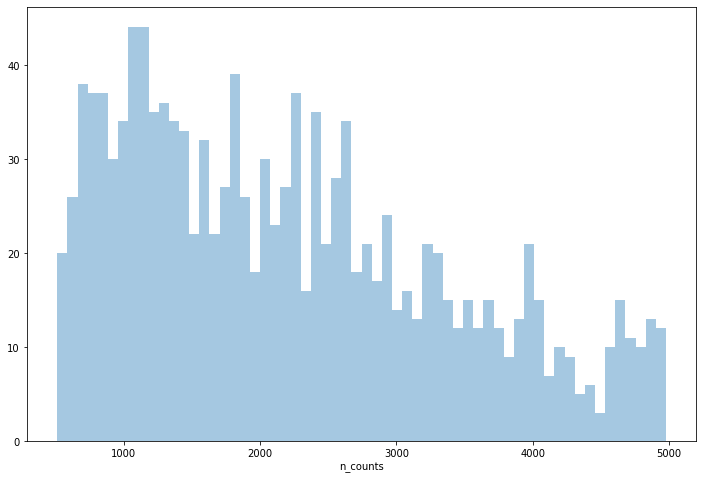

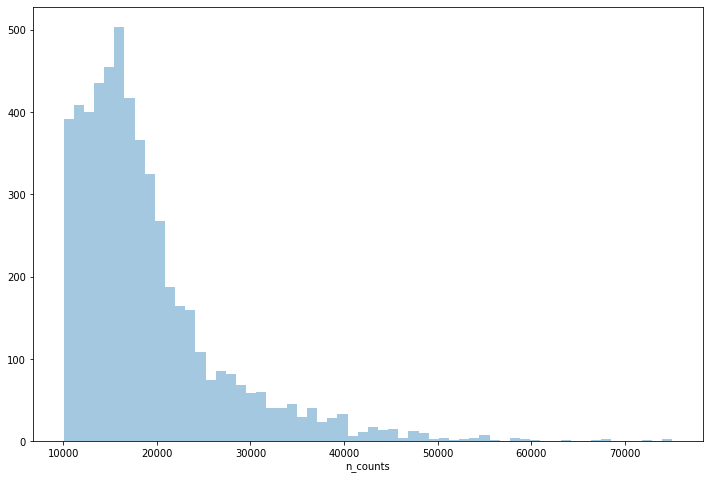

In [111]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<5000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

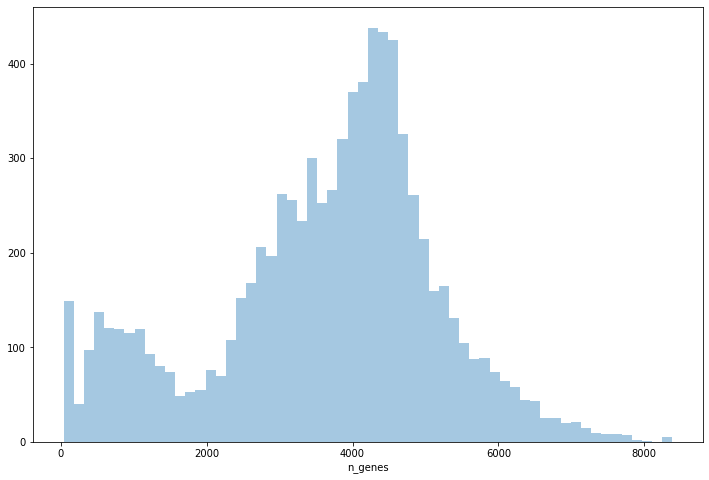

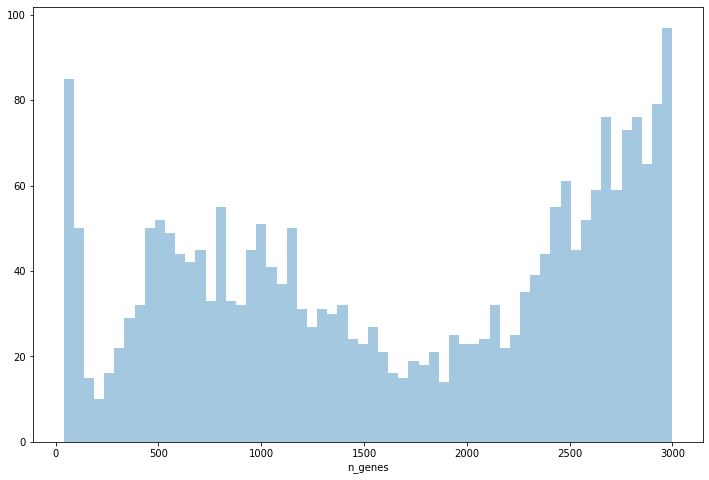

In [112]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<3000], kde=False, bins=60)
plt.show()


In [113]:
# Filter cells according to identified QC thresholds:
# leave filtering criteria relatively loose - can be made more stringent later

print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 3000)
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 25000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['percent_mito'] < 0.1]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 2000)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 8178
filtered out 969 cells that have less than 3000 counts
Number of cells after min count filter: 7209
filtered out 879 cells that have more than 25000 counts
Number of cells after max count filter: 6330
Number of cells after MT filter: 6038
filtered out 154 cells that have less than 2000 genes expressed


Trying to set attribute `.obs` of view, copying.


Number of cells after gene filter: 5884


In [114]:
# Filter out genes that are expressed in very few cells

#Filter genes:
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 31053
filtered out 17581 genes that are detected in less than 20 cells
Number of genes after cell filter: 13472


In [115]:
# normalize to 10K counts/cell and logtransform
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [116]:
adata.raw = adata
adata

AnnData object with n_obs × n_vars = 5884 × 13472 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'sex_sample_colors', 'log1p'

In [117]:
# make a new column with identifying the batches
adata.obs['batch'] = adata.obs['sample']

adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch1' if x == 'ct' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch1' if x == 'indo' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch2' if x == 'dmPGE2' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch2' if x == 'pIC' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch3' if x == 'GCSF' else x)

# ComBat batch correction
sc.pp.combat(adata, key='batch')

... storing 'batch' as categorical


Standardizing Data across genes.

Found 3 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments



/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_combat.py:338: RuntimeWarning: divide by zero encountered in true_divide
  change = max((abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max())


Adjusting data



(array([4.360e+02, 0.000e+00, 0.000e+00, 1.000e+00, 9.630e+02, 1.142e+03,
        1.000e+00, 0.000e+00, 8.000e+00, 1.000e+01, 1.700e+01, 1.000e+01,
        7.000e+00, 3.000e+00, 6.000e+00, 5.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 4.000e+00, 7.000e+00, 6.000e+00, 1.500e+01, 2.400e+01,
        4.000e+01, 4.300e+01, 3.700e+01, 6.100e+01, 9.600e+01, 8.400e+01,
        1.330e+02, 1.590e+02, 2.630e+02, 2.570e+02, 2.960e+02, 3.150e+02,
        3.530e+02, 3.140e+02, 2.600e+02, 2.100e+02, 1.340e+02, 8.100e+01,
        3.000e+01, 2.900e+01, 1.200e+01, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.38704606, -0.2917473 , -0.19644854, -0.10114978, -0.00585102,
         0.08944774,  0.1847465 ,  0.28004526,  0.37534402,  0.47064278,
         0.56594154,  0.6612403 ,  0.75653906,  0.85183782,  0.94713658,
         1.04243534,  1.1377341 ,  1.23303287,  1.32833163,  1.42363039,
         1.51892915,  1.61422791,  1.70952667,  1.80482543,  1.90012419,
         1.

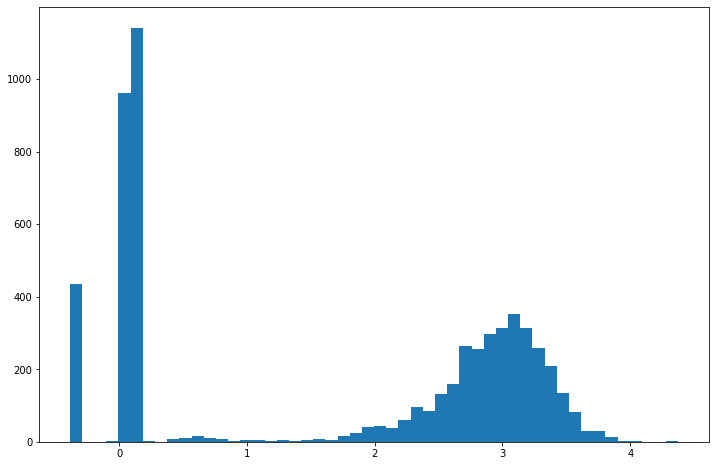

In [118]:
plt.hist(adata[: , 'Xist'].X.toarray(), bins=50)

In [119]:
#make column in adata.obs with corrected Xist

adata.obs['rXist'] = adata[: , 'Xist'].X.toarray() + 0.01 # make a column in adata.obs that stores the actual values of Xist, add 0.01 to get rid of "0" for downstream processin 

#regresses out Xist from adata 
sc.pp.regress_out(adata, ['rXist'])

regressing out ['rXist']
    finished (0:01:31)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)

 Number of highly variable genes: 2499


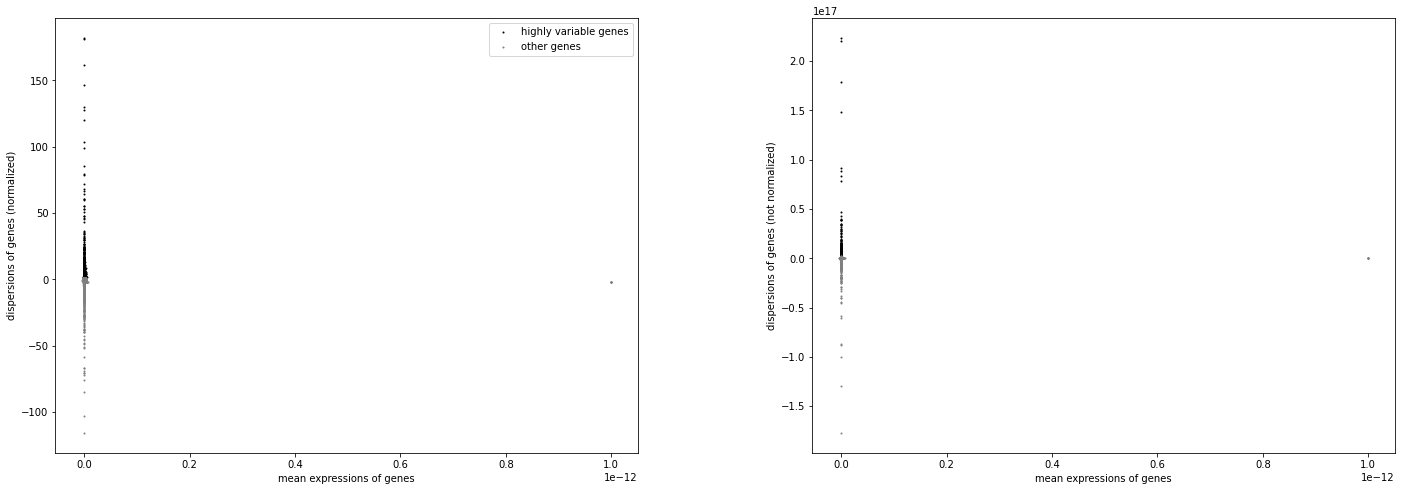

In [120]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=2500)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))

sc.pl.highly_variable_genes(adata)

In [121]:
adata #this now only contains the most variable genes

AnnData object with n_obs × n_vars = 5884 × 13472 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'rXist'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'sex_sample_colors', 'log1p'

In [122]:
#Scale data 
sc.pp.scale(adata, max_value=10)

In [123]:
# run PCA
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')

computing PCA with n_comps = 50
    on highly variable genes
    finished (0:00:02)


In [124]:
plt.rcParams['figure.figsize']=(4,4) #rescale figures

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


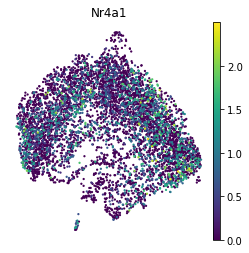

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


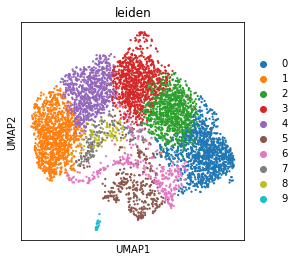

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


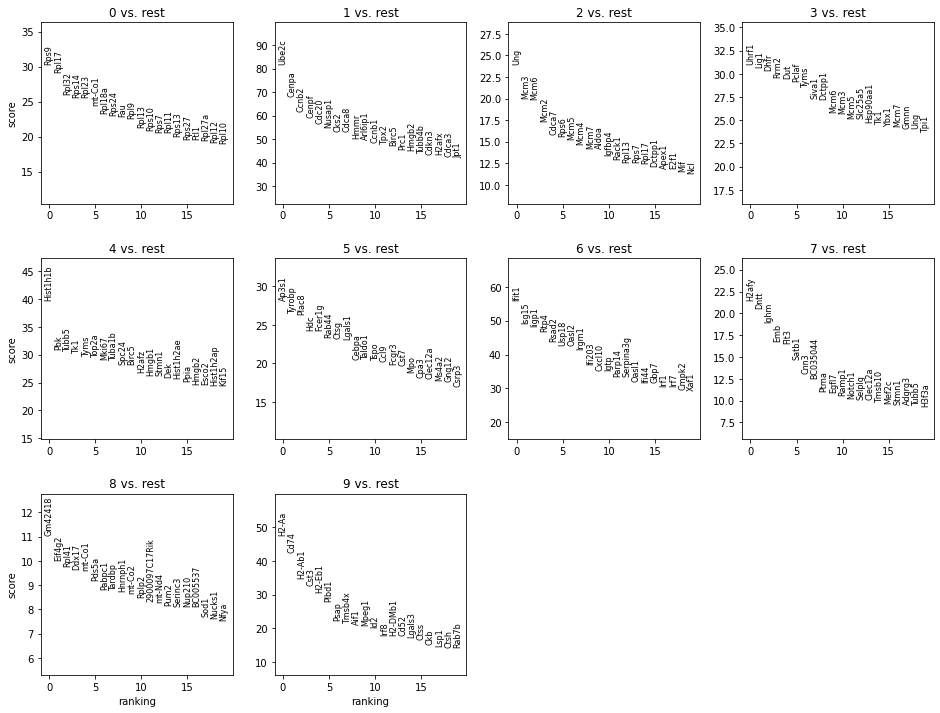

In [125]:
# redo the umap with different neigborhoods

sc.pp.neighbors(adata, n_neighbors=30, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['Nr4a1'], legend_loc='on data', frameon=False)
sc.tl.leiden(adata, resolution=0.6)
sc.pl.umap(adata, color=['leiden'])
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [126]:
adata.obs.head()

assignment   batch  counts demux_type    hto_type  \
AAAGAACAGGAAGTCC-0-0-0-0-0       MPP2  batch1  1180.0    singlet      signal   
AAAGAACGTAACCCTA-0-0-0-0-0       MPP2  batch1   975.0    singlet  background   
AAAGGATGTACACGCC-0-0-0-0-0       MPP2  batch1   805.0    singlet  background   
AAAGGATGTACGAGTG-0-0-0-0-0       MPP2  batch1   810.0    singlet  background   
AAAGGATGTCATCCGG-0-0-0-0-0       MPP2  batch1   467.0    singlet  background   

                           rna_type sample  n_counts  log_counts  n_genes  \
AAAGAACAGGAAGTCC-0-0-0-0-0   signal     ct   22280.0   10.011580     5461   
AAAGAACGTAACCCTA-0-0-0-0-0   signal     ct   24253.0   10.096501     5477   
AAAGGATGTACACGCC-0-0-0-0-0   signal     ct   19423.0    9.874368     4717   
AAAGGATGTACGAGTG-0-0-0-0-0   signal     ct    8478.0    9.046056     2923   
AAAGGATGTCATCCGG-0-0-0-0-0   signal     ct   15443.0    9.645170     4528   

                            percent_mito  Female Female_cat Female_str  \
AAAGAACAGGAAGTCC-0-0-0-0-0      0.051564    True       True       true   
AAAGAACGTAACCCTA-0-0-0-0-0      0.050004   False      False      false   
AAAGGATGTACACGCC-0-0-0-0-0      0.036909    True       True       true   
AAAGGATGTACGAGTG-0-0-0-0-0      0.055863    True       True       true   
AAAGGATGTCATCCGG-0-0-0-0-0      0.045510    True       True       true   

                           sex_sample     rXist leiden  
AAAGAACAGGAAGTCC-0-0-0-0-0    ct_true  3.124767      3  
AAAGAACGTAACCCTA-0-0-0-0-0   ct_false  0.178026      4  
AAAGGATGTACACGCC-0-0-0-0-0    ct_true  3.006543      3  
AAAGGATGTACGAGTG-0-0-0-0-0    ct_true  3.358304      0  
AAAGGATGTCATCCGG-0-0-0-0-0    ct_true  3.327009      4

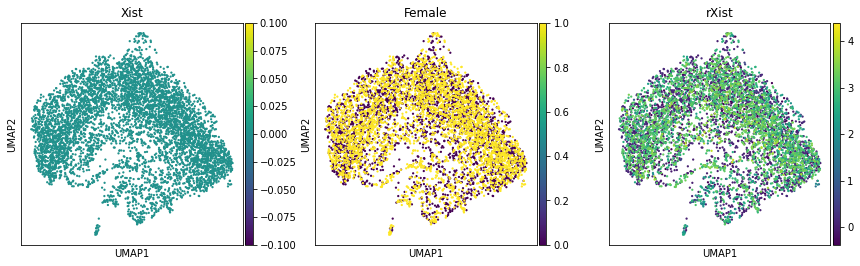

In [127]:
sc.pl.umap(adata, color=['Xist', 'Female', 'rXist'], use_raw=False )

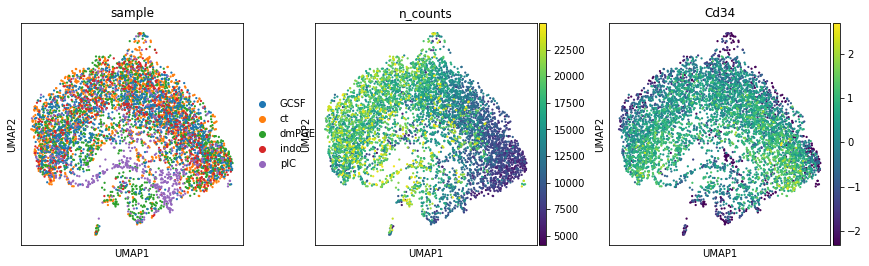

In [128]:
sc.pl.umap(adata, color=['sample', 'n_counts', 'Cd34'], use_raw=False )

In [129]:
# write the file to disk
adata.write('./sc_objects/MAST_diffexpr_MPP2_annotated.h5ad')

## MPP3/4

In [130]:
adata = None

In [131]:
adata = sc.read(
    './sc_objects/MAST_diffexpr_MPP3.h5ad')

In [132]:
adata.obs['sample'].value_counts()

pIC       1572
dmPGE2    1333
ct        1184
GCSF      1138
indo      1007
Name: sample, dtype: int64

In [133]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

# create metacolums in adata.obs for percentage mitochondrial counts and total counts/gene
mito_genes = adata.var_names.str.startswith('mt-')

# add the percent mitochondria to the adata.obs
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)

(array([3.146e+03, 1.390e+02, 2.150e+02, 2.540e+02, 3.010e+02, 2.620e+02,
        2.770e+02, 3.230e+02, 2.380e+02, 1.980e+02, 1.820e+02, 1.770e+02,
        1.270e+02, 9.900e+01, 9.900e+01, 4.500e+01, 3.300e+01, 2.900e+01,
        1.600e+01, 1.400e+01, 1.400e+01, 8.000e+00, 2.000e+00, 1.600e+01,
        1.000e+01, 0.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.  ,   4.14,   8.28,  12.42,  16.56,  20.7 ,  24.84,  28.98,
         33.12,  37.26,  41.4 ,  45.54,  49.68,  53.82,  57.96,  62.1 ,
         66.24,  70.38,  74.52,  78.66,  82.8 ,  86.94,  91.08,  95.22,
         99.36, 103.5 , 107.64, 111.78, 115.92, 120.06, 124.2 , 128.34,
        132.48, 136.62, 140.76, 144.9 , 149.04, 153.18, 157.32, 161.46,
        165.6 , 

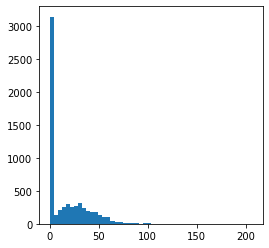

In [134]:
plt.hist(adata[: , 'Xist'].X.toarray(), bins=50)

In [135]:
# add in the Xist metadata to the adata.obs

adata.obs['Female'] = adata[: , 'Xist'].X.toarray() > 0 # make a column in adata.obs to identify female cells
adata.obs['Female_cat']=adata.obs['Female'].astype('category', copy=True) # make a column with category as dtype

### Make a metacolumn that stores male and female cells

adata.obs['Female_str'] = adata.obs['Female'].map(lambda x: str(x).lower() if isinstance(x, bool) else  x)
adata.obs['sex_sample'] = adata.obs['sample'].str.cat(others = adata.obs['Female_str'], sep='_')
adata.obs['sex_sample']=adata.obs['sex_sample'].astype('category', copy=True) # make a column with category as dtype

# make a metacolumn that sto
adata.obs['sex_sample'].value_counts()

pIC_true        838
pIC_false       734
dmPGE2_false    667
dmPGE2_true     666
ct_false        646
GCSF_true       622
indo_true       543
ct_true         538
GCSF_false      516
indo_false      464
Name: sex_sample, dtype: int64

In [136]:
plt.rcParams['figure.figsize']=(12,8) #rescale figures

... storing 'Female_str' as categorical


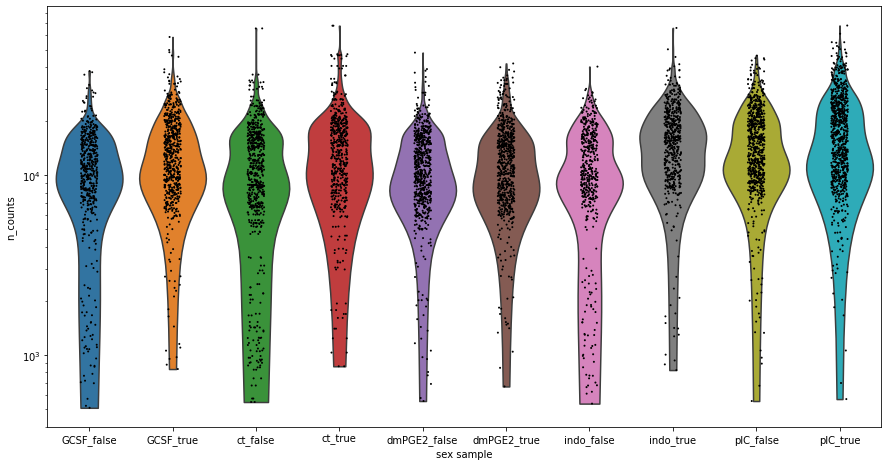

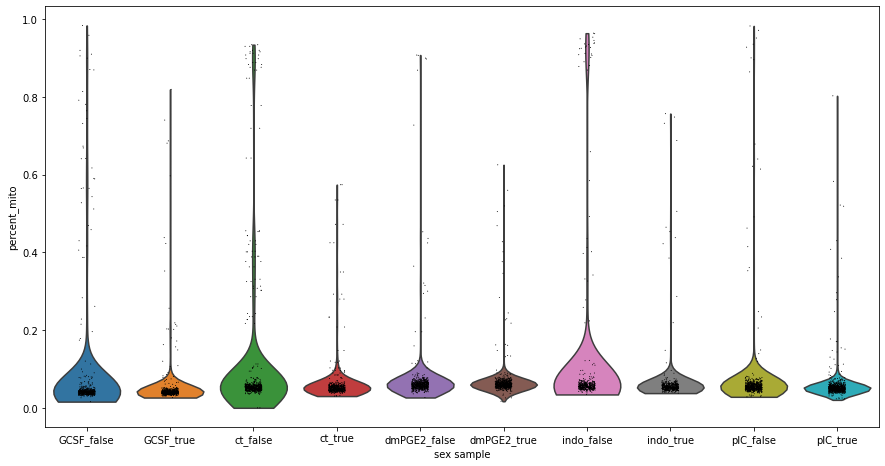

In [137]:
# Quality control - plot QC metrics
#Sample quality plots
t1 = sc.pl.violin(adata, 'n_counts', groupby='sex_sample', size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'percent_mito', groupby='sex_sample')

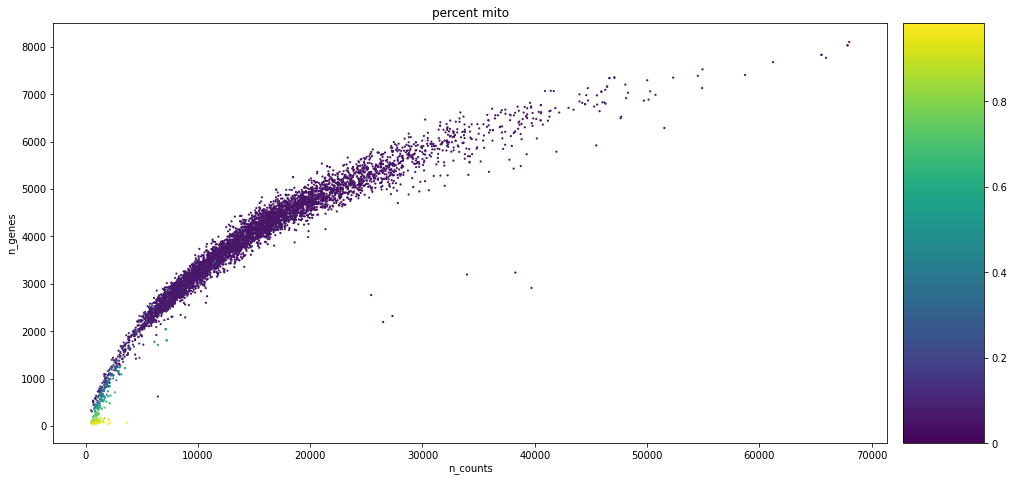

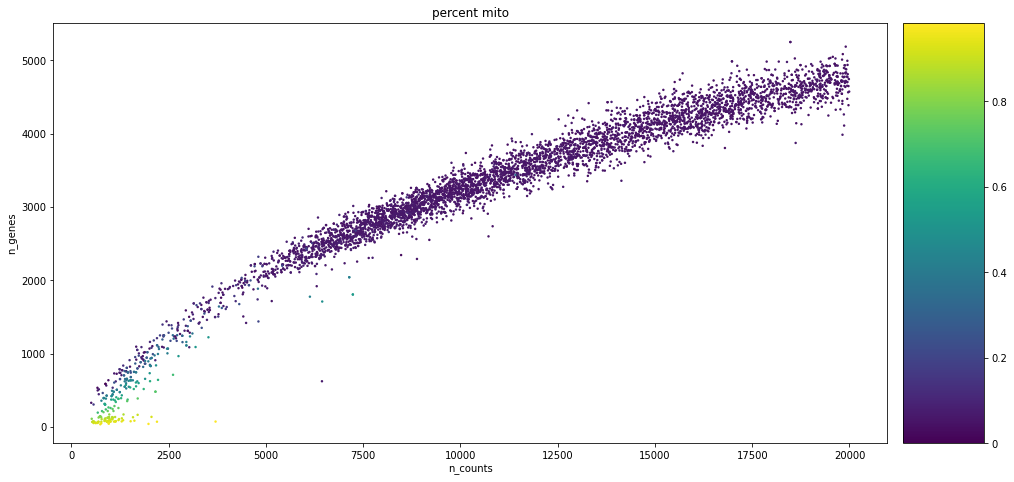

In [138]:
#Data quality summary plots
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='percent_mito')
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<20000], 'n_counts', 'n_genes', color='percent_mito')

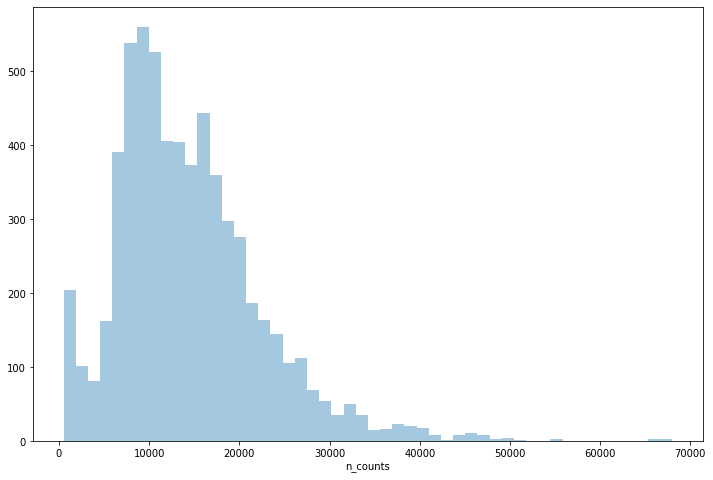

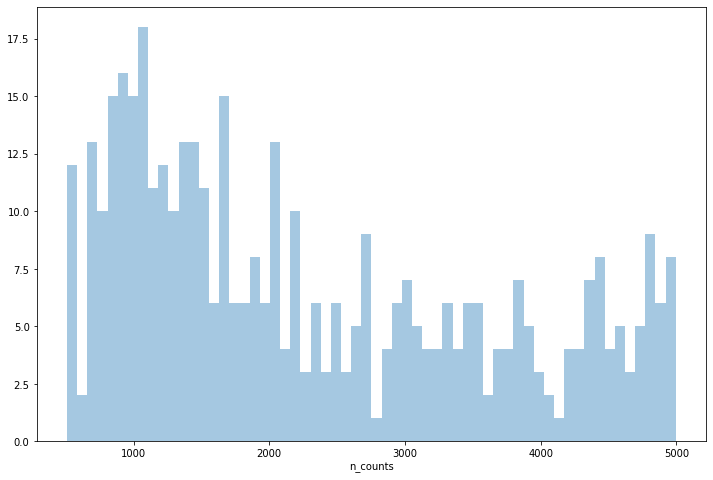

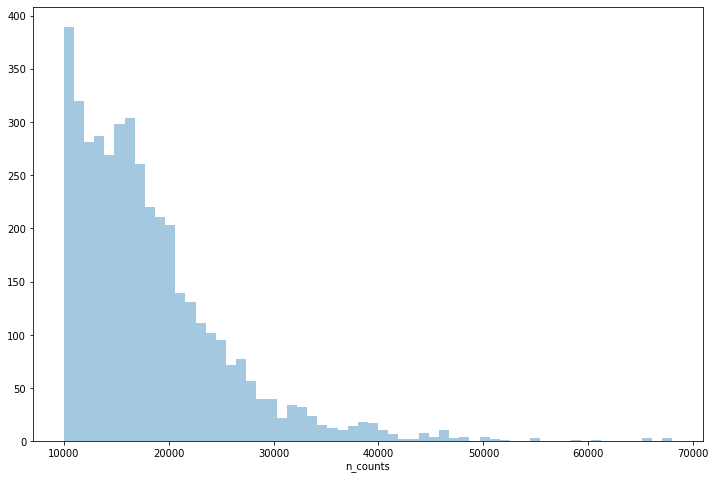

In [139]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<5000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

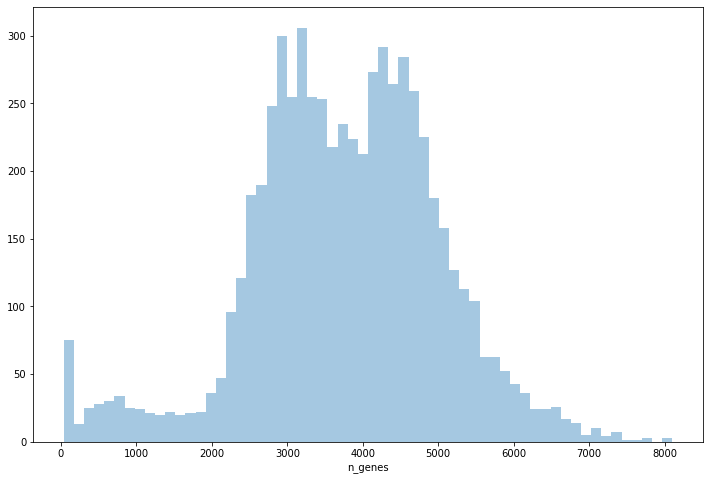

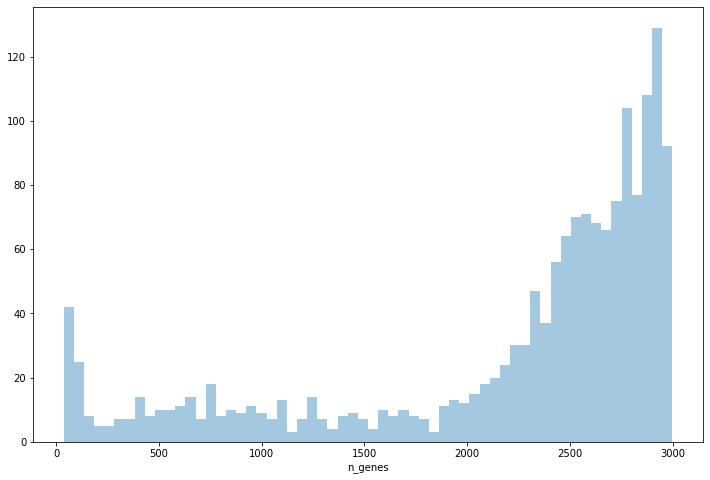

In [140]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<3000], kde=False, bins=60)
plt.show()


In [141]:
# Filter cells according to identified QC thresholds:
# leave filtering criteria relatively loose - can be made more stringent later

print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 3000)
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 25000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['percent_mito'] < 0.1]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 2000)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 6234
filtered out 294 cells that have less than 3000 counts
Number of cells after min count filter: 5940
filtered out 603 cells that have more than 25000 counts
Number of cells after max count filter: 5337
Number of cells after MT filter: 5261
filtered out 64 cells that have less than 2000 genes expressed


Trying to set attribute `.obs` of view, copying.


Number of cells after gene filter: 5197


In [142]:
# Filter out genes that are expressed in very few cells

#Filter genes:
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 31053
filtered out 17988 genes that are detected in less than 20 cells
Number of genes after cell filter: 13065


In [143]:
# normalize to 10K counts/cell and logtransform
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [144]:
adata.raw = adata
adata

AnnData object with n_obs × n_vars = 5197 × 13065 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'sex_sample_colors', 'log1p'

In [145]:
# make a new column with identifying the batches
adata.obs['batch'] = adata.obs['sample']

adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch1' if x == 'ct' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch1' if x == 'indo' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch2' if x == 'dmPGE2' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch2' if x == 'pIC' else x)
adata.obs['batch'] = adata.obs['batch'].apply(lambda x: 'batch3' if x == 'GCSF' else x)

# ComBat batch correction
sc.pp.combat(adata, key='batch')

... storing 'batch' as categorical


Standardizing Data across genes.

Found 3 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments



/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_combat.py:338: RuntimeWarning: divide by zero encountered in true_divide
  change = max((abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max())


Adjusting data



(array([4.44e+02, 2.14e+03, 0.00e+00, 0.00e+00, 4.00e+00, 7.00e+00,
        1.00e+01, 1.20e+01, 1.20e+01, 8.00e+00, 5.00e+00, 2.00e+00,
        1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 3.00e+00, 3.00e+00, 8.00e+00, 1.00e+01,
        5.00e+00, 1.90e+01, 2.90e+01, 2.00e+01, 4.20e+01, 4.10e+01,
        6.00e+01, 7.50e+01, 8.70e+01, 1.47e+02, 1.51e+02, 1.74e+02,
        2.50e+02, 2.66e+02, 2.94e+02, 2.67e+02, 2.07e+02, 1.49e+02,
        9.70e+01, 7.40e+01, 3.30e+01, 1.80e+01, 6.00e+00, 7.00e+00,
        0.00e+00, 2.00e+00]),
 array([-0.12085749, -0.03511278,  0.05063192,  0.13637663,  0.22212133,
         0.30786604,  0.39361074,  0.47935544,  0.56510015,  0.65084485,
         0.73658956,  0.82233426,  0.90807897,  0.99382367,  1.07956838,
         1.16531308,  1.25105779,  1.33680249,  1.4225472 ,  1.5082919 ,
         1.59403661,  1.67978131,  1.76552601,  1.85127072,  1.93701542,
         2.02276013,  2.10850483,  2.19424954,  2.27999424,  

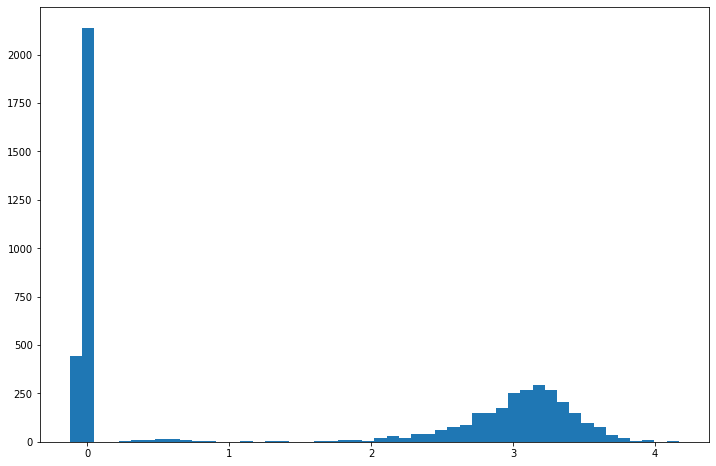

In [146]:
plt.hist(adata[: , 'Xist'].X.toarray(), bins=50)

In [147]:
#make column in adata.obs with corrected Xist

adata.obs['rXist'] = adata[: , 'Xist'].X.toarray() + 0.01 # make a column in adata.obs that stores the actual values of Xist, add 0.01 to get rid of "0" for downstream processin 

#regresses out Xist from adata 
sc.pp.regress_out(adata, ['rXist'])

regressing out ['rXist']
    finished (0:01:21)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)

 Number of highly variable genes: 2499


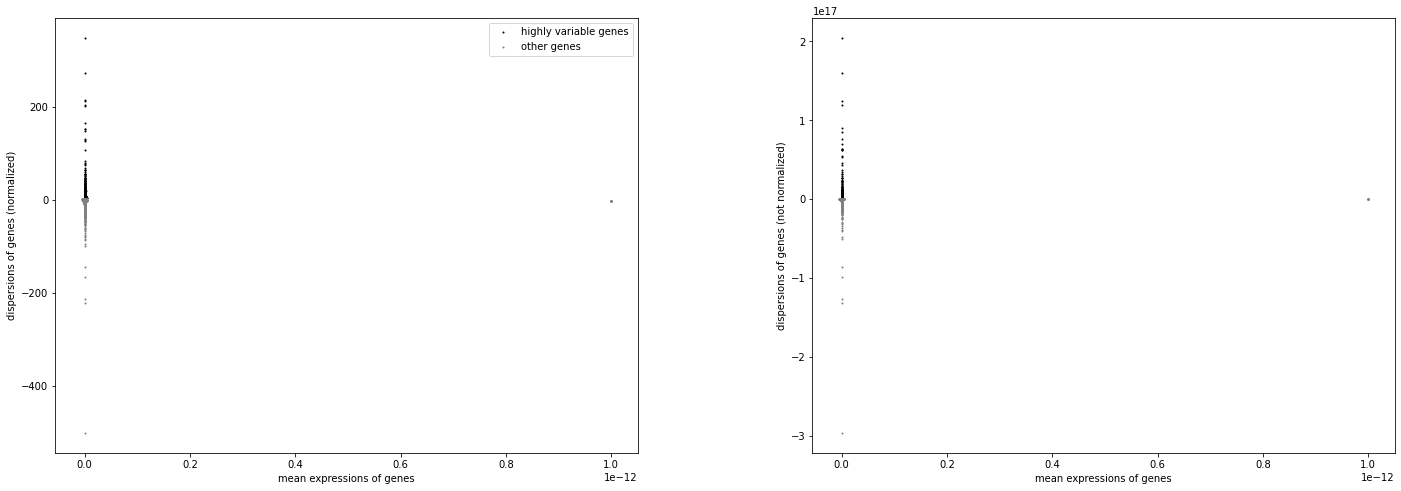

In [148]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=2500)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))

sc.pl.highly_variable_genes(adata)

In [149]:
adata #this now only contains the most variable genes

AnnData object with n_obs × n_vars = 5197 × 13065 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'rXist'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'sex_sample_colors', 'log1p'

In [150]:
#Scale data 
sc.pp.scale(adata, max_value=10)

In [151]:
# run PCA
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')

computing PCA with n_comps = 50
    on highly variable genes
    finished (0:00:01)


In [152]:
plt.rcParams['figure.figsize']=(4,4) #rescale figures

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


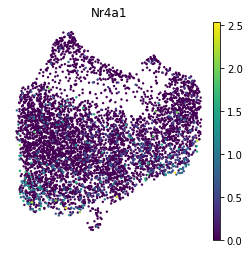

running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


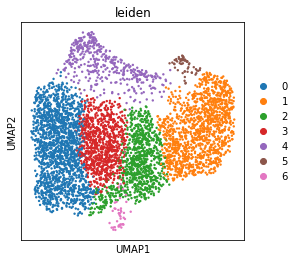

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


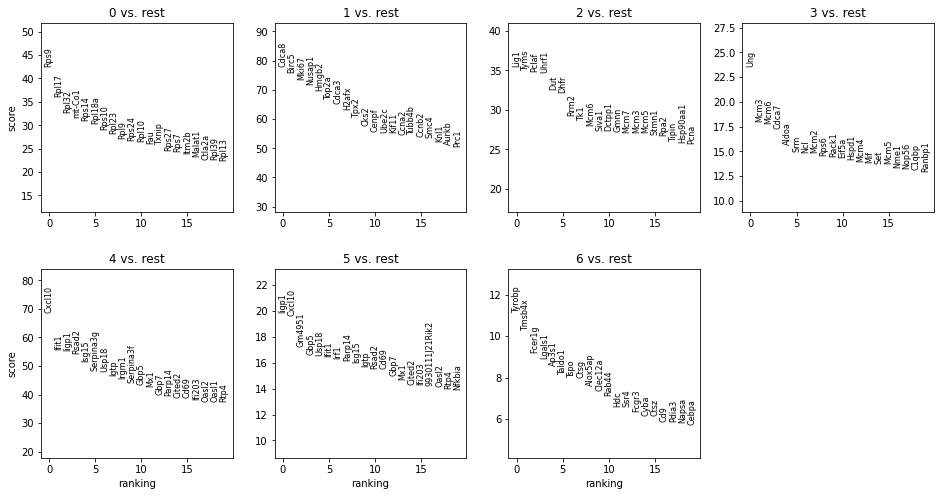

In [153]:
# redo the umap with different neigborhoods

sc.pp.neighbors(adata, n_neighbors=30, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['Nr4a1'], legend_loc='on data', frameon=False)
sc.tl.leiden(adata, resolution=0.6)
sc.pl.umap(adata, color=['leiden'])
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [154]:
adata.obs.head()

assignment   batch  counts demux_type    hto_type  \
AAACGAAGTTGGACCC-0-0-0-0-0       MPP3  batch1   902.0    singlet  background   
AAAGGATGTAGTCTGT-0-0-0-0-0       MPP3  batch1   694.0    singlet  background   
AAAGGTATCTTCGACC-0-0-0-0-0       MPP3  batch1  3446.0    singlet      signal   
AAAGTGATCTAAGGAA-0-0-0-0-0       MPP3  batch1   783.0    singlet  background   
AACAAAGTCGGCTGTG-0-0-0-0-0       MPP3  batch1   951.0    singlet  background   

                           rna_type sample  n_counts  log_counts  n_genes  \
AAACGAAGTTGGACCC-0-0-0-0-0   signal     ct   13505.0    9.511259     3991   
AAAGGATGTAGTCTGT-0-0-0-0-0   signal     ct    8684.0    9.070044     3154   
AAAGGTATCTTCGACC-0-0-0-0-0   signal     ct   15873.0    9.672815     4302   
AAAGTGATCTAAGGAA-0-0-0-0-0   signal     ct   16486.0    9.710449     4119   
AACAAAGTCGGCTGTG-0-0-0-0-0   signal     ct   17801.0    9.787459     4641   

                            percent_mito  Female Female_cat Female_str  \
AAACGAAGTTGGACCC-0-0-0-0-0      0.057805    True       True       true   
AAAGGATGTAGTCTGT-0-0-0-0-0      0.059602    True       True       true   
AAAGGTATCTTCGACC-0-0-0-0-0      0.046851    True       True       true   
AAAGTGATCTAAGGAA-0-0-0-0-0      0.034508   False      False      false   
AACAAAGTCGGCTGTG-0-0-0-0-0      0.057387    True       True       true   

                           sex_sample     rXist leiden  
AAACGAAGTTGGACCC-0-0-0-0-0    ct_true  3.218221      2  
AAAGGATGTAGTCTGT-0-0-0-0-0    ct_true  3.265923      0  
AAAGGTATCTTCGACC-0-0-0-0-0    ct_true  3.039035      1  
AAAGTGATCTAAGGAA-0-0-0-0-0   ct_false  0.028160      2  
AACAAAGTCGGCTGTG-0-0-0-0-0    ct_true  3.063702      3

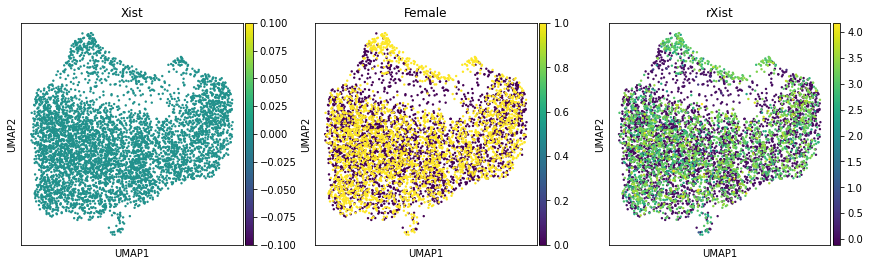

In [155]:
sc.pl.umap(adata, color=['Xist', 'Female', 'rXist'], use_raw=False )

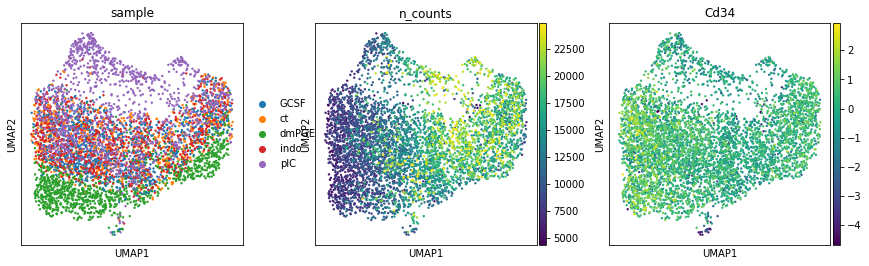

In [156]:
sc.pl.umap(adata, color=['sample', 'n_counts', 'Cd34'], use_raw=False )

In [157]:
# write the file to disk
adata.write('./sc_objects/MAST_diffexpr_MPP3_annotated.h5ad')

In [158]:
sc.logging.print_versions()
pd.show_versions()

scanpy==1.4.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.17.3 scipy==1.3.0 pandas==0.25.3 scikit-learn==0.22.2.post1 statsmodels==0.10.0 python-igraph==0.7.1 louvain==0.6.1

INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.3.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.19.76-linuxkit
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 0.25.3
numpy            : 1.17.3
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 41.6.0.post20191101
Cython           : None
pytest           : 5.3.5
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.